# **House Prices - A Regression Analysis**

### **Summary:**
**We conduct regression analysis on the House Prices dataset found on the past Kaggle competition *House Prices: Advanced Regression Techniques.* The dataset contains 80 features that each describe one characteristic of real estate properties that sold between the years 2006 to 2010. The target variable used for prediction is the sale price of the home.  The data contains 1,460 records with 5.9 percent missing values. This analysis utilizes multiple regression models, ensembles, principle component analysis, and neural networks to predict the sale price of a house.**

## Set Environment

In [ ]:
# Load packages
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

random_state = 42

# Set column/row view
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
# Load data
house = pd.read_csv("train.csv")

## Data Exploration and Preprocessing

**The primary purpose for imputing missing values before the test train split is that most of the missing values in the data set are representative of actual values.  For example, the three basement type variables contain null values across equivalent rows whenever the Has Basement variable value is "NO". Therefore, those values are imputed with "0" or "None". The only missing value for the Electrical variable appears to have been a random error.  The property is most similar qualitatively to the properties associate with the category of "Standard Circuit", which is also the most prevalent type.  Therefore, because missing values are logically associated with actual values, we would impute the same values for both the train and test sets anyway.**

**The heatmap matrix reveals that some significant multicollinearity exists that will have to be addressed. However, some of the relationships between the continuous predictors aren't as correlated as is intuitively expected.  This condition requires that we locate and remove significant levels of spurious information in order to uplift the true relationships between relevant predictors. Other variables, such as Overall Quality and Living Area, have significant correlation with the target price variable**

**Our decision to drop columns is based on an extensive search of correlation, spuriousness, feature leakage, and redundancy. Examples of some of these are provided in the Variable Relationships section of this report. We define the reasoning of some of those decisions here.  The Year Sold and Sale Condition variables would not be known prior to the sale of the property. Variables that represent the same characteristics, such as Garage Cars and Garage Square Feet, are analyzed to determine which provides the highest level of information gain, and only one is retained.  The Total Rooms and Total Rooms On Each Floor variables are also culled in this manner. Certain variables, such as Street, are nearly entirely defined by a single category.  They would not offer the model appropriate discernment.  Also, variables such as the Zoning Class, contain a great number of categories, and would create a very sparse matrix if the one-hot transformation were applied.  This information is also captured in other variables such as Property Type.  These and other considerations are used to determine the columns that have been removed. It is important to note, that after all transformations and removals, no null values remain in the set.**

### Explore

In [ ]:
house.shape

(1460, 81)

In [ ]:
house.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [ ]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [ ]:
# Percentage Nulls
house.isnull().sum().sum() / (1460*81)

0.05889565364451209

In [ ]:
# Count NA / NaN
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# Percent NA per column
house.isnull().sum() * 100 / len(house)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

### Handle NA

In [ ]:
# Bsmt exposure NA, but has bsmt - Replace Bsmts' NA with None
# house[house["BsmtExposure"].isnull()]
house.fillna({"BsmtQual": "None", "BsmtExposure": "None", "BsmtFinType1": "None"}, inplace=True)

In [ ]:
# Replace NA with None
house.fillna({"GarageType": "None", "GarageFinish": "None"}, inplace=True)

In [ ]:
# Electrical missing 1, standard house - replace with
# house[house["Electrical"].isnull()]
house["Electrical"].fillna(value = "SBrkr", inplace = True)

In [ ]:
# Examine Mas NA
house[house["MasVnrType"].isnull()]
house["MasVnrType"].fillna(value = "Uncertain", inplace = True)

In [ ]:
# NA treated as not having Vnr
house["MasVnrArea"].fillna(value = 0, inplace = True)

### Heatmap with all Predictors

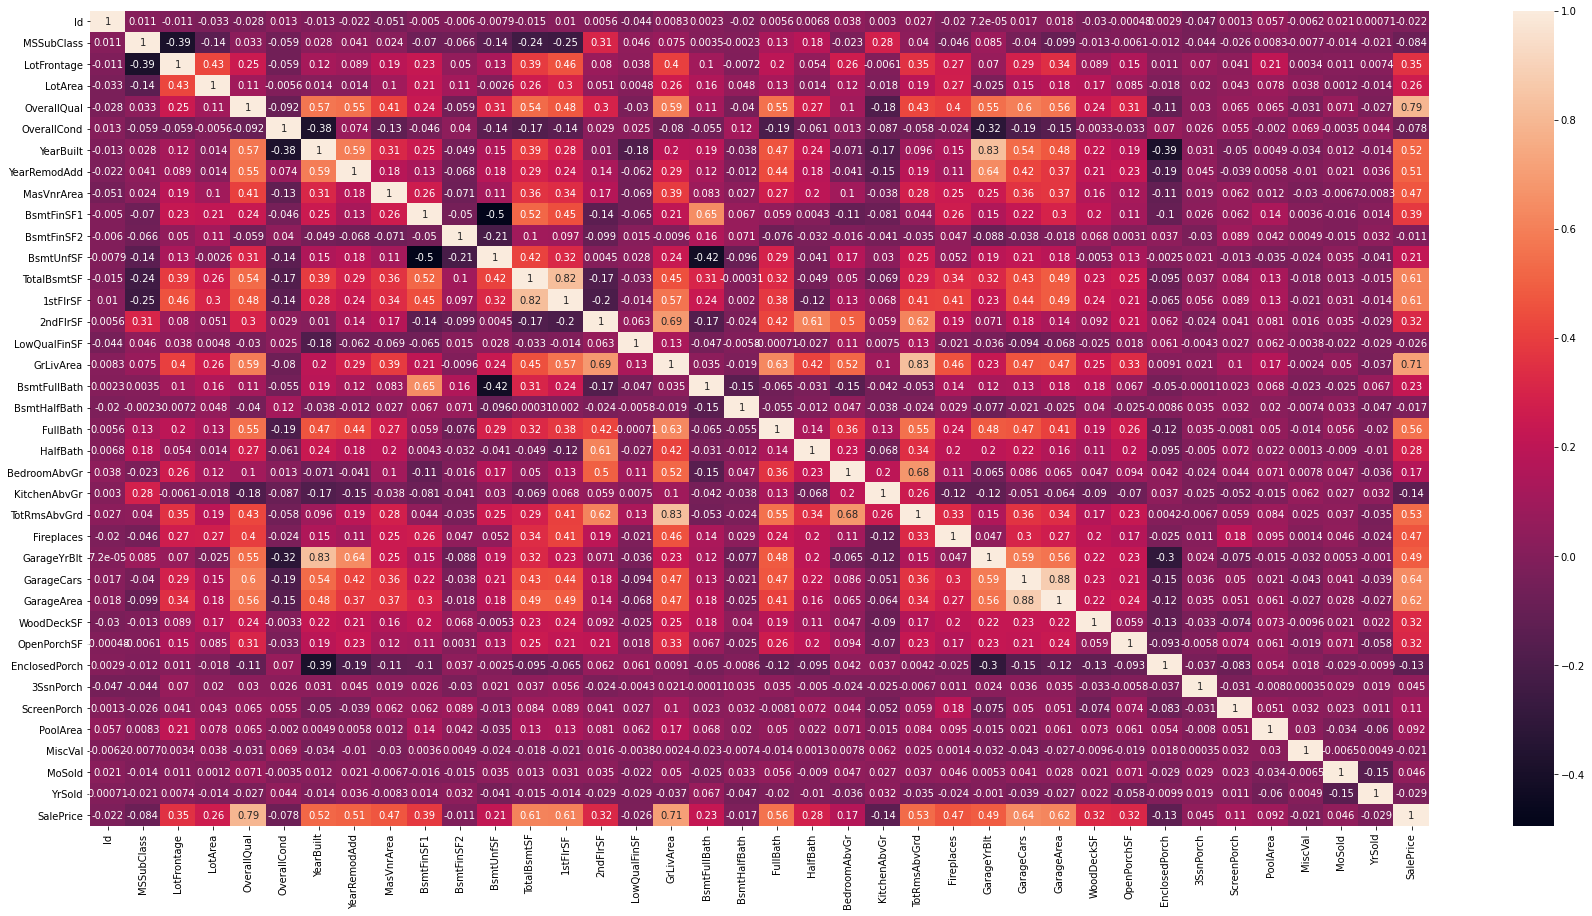

In [ ]:
cor = house.corr()
plt.figure(figsize=(30,15))
sns.heatmap(cor, annot = True)

### Drop columns

In [ ]:
# Drop unnecessary columns
house.drop(columns = ["Id", "Alley", "FireplaceQu", "PoolQC", "MiscFeature", "Fence", "Utilities", "YearBuilt",
                     "RoofMatl", "RoofStyle", "BsmtCond", "BsmtFinType2", "Heating", "LowQualFinSF", "KitchenAbvGr",
                     "GarageQual", "GarageCond", "YrSold", "SaleType", "SaleCondition", "Street", "Condition1",
                      "Condition2", "LotConfig", "Fence", "Neighborhood", "MiscFeature", "LandContour", "MSZoning", "GarageYrBlt",
                     "TotRmsAbvGrd", "1stFlrSF", "2ndFlrSF", "GarageArea", "LotFrontage", "BsmtFinSF2",
                     "BsmtFinSF1", "BsmtUnfSF", "BsmtFullBath", "BsmtHalfBath", "BedroomAbvGr", "PoolArea", "MoSold",
                     "MiscFeature", "Exterior1st", "Exterior2nd", "ExterCond", "Foundation", "1stFlrSF", "2ndFlrSF",
                     "Functional", "MiscVal", "MSSubClass"], inplace = True)

In [ ]:
# No NA remain
print(house.shape)
house.isnull().sum() * 100 / len(house)

(1460, 33)


LotArea          0.0
LotShape         0.0
LandSlope        0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearRemodAdd     0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
TotalBsmtSF      0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
GrLivArea        0.0
FullBath         0.0
HalfBath         0.0
KitchenQual      0.0
Fireplaces       0.0
GarageType       0.0
GarageFinish     0.0
GarageCars       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
SalePrice        0.0
dtype: float64

## Variable Relationships

**This section provides the research methods for every one of the categorical and continuous predictors.  For categorical variables, we counted their number of occurences, plotted the distribution of their categories with respect the the Price variable using boxplots, and examined the regressor correlations with a cross classification table. It is in this way that we determined which categories would be combined in the map and one-hot outputs, as well as which categorical variables were considered highly correlated.  For example, the Kitchen Quality and Exterior Quality variables produced a diagonal classification matrix where each respective category, such as "Excellent" or "Poor", matches with the same, or close to the same category as the other variable.  In this case, we mapped the categories to numerical values and created an aggregated variable that combined them both into an average. In this way both quality variables would have an equal input into the new variable.**

**For continuous variables we looked at the heatmap that was presented before.  We also utilized a scatter plot and a correlation coefficient between regressors in order to determine if collinearity exists.  This is how we removed significant correlation effects in the numerical columns, either by removing variables or combining them in an aggregate form. All predictor transformations are presented in the section titled Feature Transformation. They are based on the conclusions from this section.  Every one-hot and map values transformation contains a comment to convey its purpose.  In most cases, categories and nulls are combined according to their similar distributions across the Price variable. We also combined the 5 porch variables into a single variable that captures the total square feet of the porch, and  number of baths variables into a single variable that aggregates the number of baths. Then we removed them since their information was captured by our method. This reduces the dimension while providing a very similar learning capability for the models.**

### Categorical

In [ ]:
# Count categorical occurences
house["PavedDrive"].value_counts(dropna = False)

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

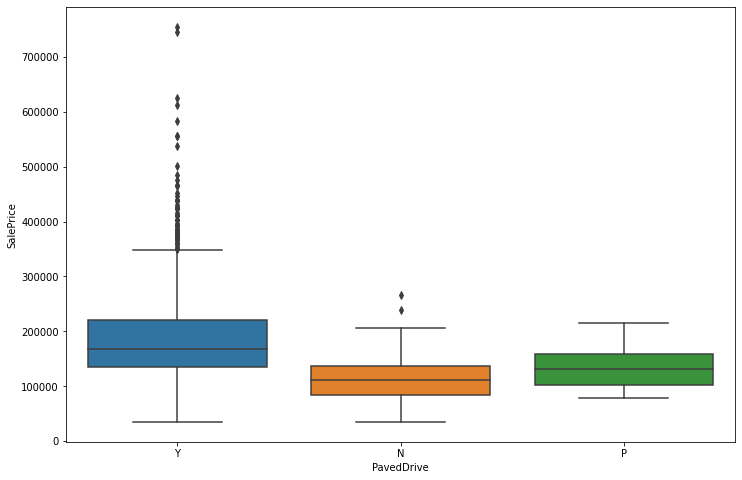

In [ ]:
# Variable categorical distributions
plt.figure(figsize=(12,8))
sns.boxplot(x="PavedDrive", y = "SalePrice", data = house)

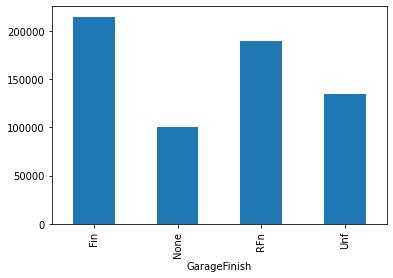

In [ ]:
# Plot Categories by Median Price
house.groupby("GarageFinish")["SalePrice"].median().plot(kind = "bar")

In [ ]:
# Categorical correlation - Cross Class table
pd.crosstab(house["ExterQual"], house["KitchenQual"])

KitchenQual,Ex,Fa,Gd,TA
ExterQual,,,,
Ex,42,0,8,2
Fa,0,8,0,6
Gd,47,0,408,33
TA,11,31,170,694


### Contiuous

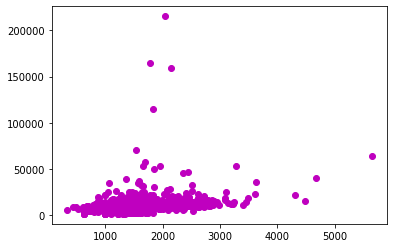

In [ ]:
# Scatter
plt.scatter(house["GrLivArea"], house["LotArea"], c = 'm')

In [ ]:
# Pearson's Correl Coef
house["GrLivArea"].corr(house["LotArea"])

0.26311616716714814

## Feature Transform

### Map & Combine

In [ ]:
# Separate keys for same value
house["LotShape"] = house["LotShape"].map({"IR1": 1, "IR2": 1, "IR3": 1, "Reg" : 0}).astype("int64")

In [ ]:
house["LandSlope"] = house["LandSlope"].map({"Mod": 0, "Sev": 0, "Gtl": 1}).astype("int64")

In [ ]:
# Don't use quotes for numerical column names
house["OverallQual"] = house["OverallQual"].map({1: 1, 2: 1, 3: 1, 4: 2, 5: 3,
                                                 6: 4, 7: 5, 8: 6, 9: 7, 10: 8}).astype("int64")

In [ ]:
# Combine cat (1-4) & (5-9)
house["OverallCond"] = house["OverallCond"].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 1,
                                                 6: 1, 7: 1, 8: 1, 9: 1}).astype("int64")

In [ ]:
# Combine K/E Quality vars, map cats, average, and drop
house["KitchenQual"] = house["KitchenQual"].map({"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}).astype("int64")
house["ExterQual"] = house["ExterQual"].map({"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}).astype("int64")
house["KEQual"] = house[["ExterQual", "KitchenQual"]].mean(axis = 1)
house.drop(columns = ['ExterQual', "KitchenQual"], axis = 1, inplace = True)

In [ ]:
house["CentralAir"] = house["CentralAir"].map({"Y": 1, "N": 0}).astype("int64")

In [ ]:
# Combine Ex & (Gd/TA) & (Fa/Po)
house["HeatingQC"] = house["HeatingQC"].map({"Ex": 3, "Gd": 2, "TA": 2, "Fa": 1, "Po" : 1}).astype("int64")

In [ ]:
# Combine N&P
house["PavedDrive"] = house["PavedDrive"].map({"Y": 1, "N": 0, "P": 0}).astype("int64")

In [ ]:
# Combine 2&3
house["Fireplaces"] = house["Fireplaces"].map({0: 1, 1: 2, 2: 3, 3: 3}).astype("int64")

In [ ]:
# Combine cat 0&1, 2&4 - similar distribution
house["GarageCars"] = house["GarageCars"].map({0: 1, 1: 1, 2: 2, 3: 3, 4: 2}).astype("int64")

In [ ]:
# Combine baths Abv Ground
house["Baths"] = house["FullBath"] + (house["HalfBath"]/2)
house.drop(['FullBath', "HalfBath"], axis = 1, inplace = True)

In [ ]:
# Combine Total Porch/Deck SF
house["PorchSF"] = house["WoodDeckSF"] + house["OpenPorchSF"] + house["EnclosedPorch"] + house["3SsnPorch"] + house["ScreenPorch"]
house.drop(columns = ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"], inplace = True)

In [ ]:
# Combine Fa/None(no bsmt)
house["BsmtQual"] = house["BsmtQual"].map({"Ex": 3, "Gd": 2, "TA": 1, "Fa": 0, "None": 0}).astype("int64")

In [ ]:
# Combine Gd/Av, Mn/No(no exp), None(no bsmt)
house["BsmtExposure"] = house["BsmtExposure"].map({"Gd": 2, "Av": 2, "Mn": 1, "No": 1, "None": 0}).astype("int64")

In [ ]:
# Combine cats with similar distributions
house["BsmtFinType1"] = house["BsmtFinType1"].map({"GLQ": 3, "ALQ": 2, "Unf": 2, "Rec": 1, "BLQ": 1, "LwQ": 1,
                                                  "None": 0}).astype("int64")

In [ ]:
# Binary map
house["Electrical"] = house["Electrical"].map({"SBrkr": 1, "FuseF": 0, "FuseA": 0, "FuseP": 0, "Mix": 0}).astype("int64")

In [ ]:
# Combine Unf/None
house["GarageFinish"] = house["GarageFinish"].map({"Fin": 2, "RFn": 1, "Unf": 0, "None": 0}).astype("int64")

In [ ]:
# Combine cats w/similar dist
house["GarageType"] = house["GarageType"].map({"Attchd": 2, "BuiltIn": 2, "Detchd": 1, "2Types": 0, "Basment": 1,
                                              "CarPort": 0, "None": 0}).astype("int64")

In [ ]:
# DO NOT RUN: High correlation - remove 1st/2nd SF
# HSF = house["1stFlrSF"]+house["2ndFlrSF"]
# house["GrLivArea"].corr(HSF)
# plt.scatter(house["GrLivArea"], HSF)

### One Hot

In [ ]:
# Combine Building Type 3 cats
house.replace({"BldgType": {"2fmCon": "Comb", "Duplex": "Comb", "Twnhs": "Comb"}}, inplace = True)
house = house.join(pd.get_dummies(house["BldgType"], prefix = "BldType", dtype = float))
house.drop(columns = "BldgType", inplace = True)

In [ ]:
# Combine House Style by Story - cannot replace key with same value
house.replace({"HouseStyle": {"2Story": "2story", "2.5Unf": "2story", "2.5Fin": "2story", "SLvl": "2story",
                              "1Story": "1story", "1.5Fin": "1.5story", "1.5Unf": "1.5story", "SFoyer": "1.5story"}},
              inplace = True)
house = house.join(pd.get_dummies(house["HouseStyle"], dtype = float))
house.drop(columns = "HouseStyle", inplace = True)

In [ ]:
# Combine Building Type 3 cats
house.replace({"MasVnrType": {"BrkFace": "brkface", "Stone": "stone", "None": "none", "BrkCmn": "none",
                             "Uncertain": "none"}}, inplace = True)
house = house.join(pd.get_dummies(house["MasVnrType"], prefix = "mas", dtype = float))
house.drop(columns = "MasVnrType", inplace = True)

## Heatmap of Final Data Set

**The heatmap matrix of the final set, which is utilized by the models, reveals substantial differences from the one before. Certain variables that were intuitively related but not correlated, now have a stronger relationship.  The combined Kitchen and Exterior Quality variable is now strongy correlated with Overall Quality, and Total Baths with Living Area. The dependent Sale Price variable also shows stronger relationships with intuitively important predictors such as Garage Cars and all of the Quality Variables.  This makes us confident that our model is now capturing real phenomenon, and that there has been a great reduction in spurious behavior.**

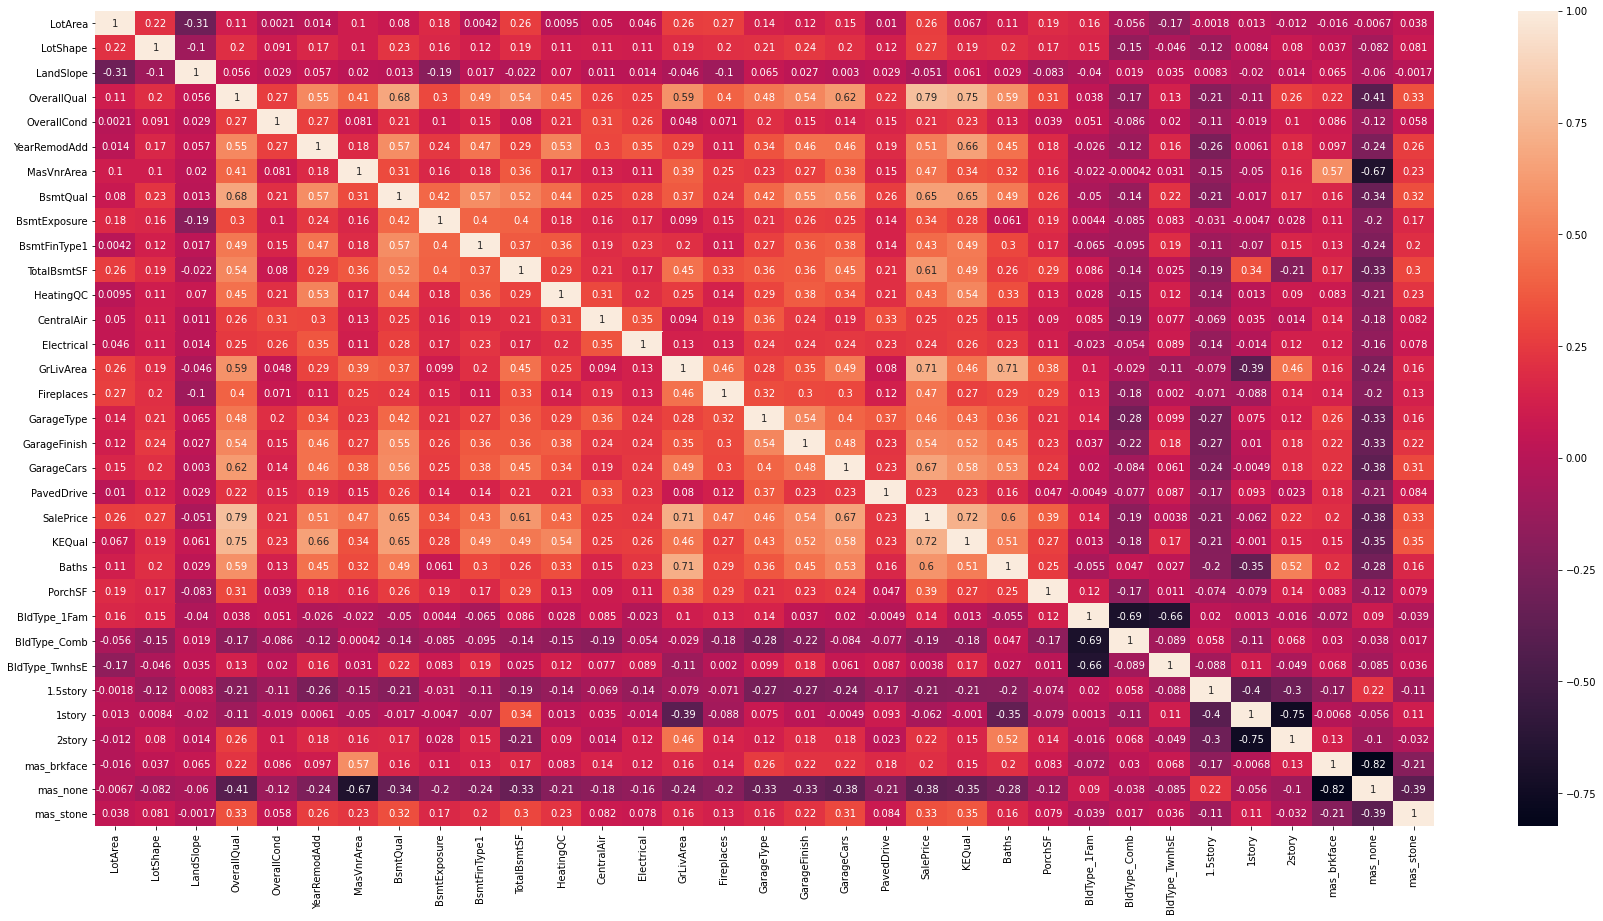

In [ ]:
cor = house.corr()
plt.figure(figsize=(30,15))
sns.heatmap(cor, annot = True)

## Split & Scale

**Including the one-hot transformations, our model has reduced from 80 regressors to 32.  All of our columns now exhibit integer or float data types, and there are no NaN or infinite values remaining.  That leaves us satisfied that our transformations were exhaustive.  Our decision to use the Standard Scaler is because we had the presence of some logical, but large outliers that might have impacted the Min Max Scaler.  Not all of our variables are normally distributed, as tested by the histograms in this section, but the robust behavior of the Standard Scaler conformed more to the data set.**

In [ ]:
house.shape

(1460, 33)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotArea         1460 non-null   int64  
 1   LotShape        1460 non-null   int64  
 2   LandSlope       1460 non-null   int64  
 3   OverallQual     1460 non-null   int64  
 4   OverallCond     1460 non-null   int64  
 5   YearRemodAdd    1460 non-null   int64  
 6   MasVnrArea      1460 non-null   float64
 7   BsmtQual        1460 non-null   int64  
 8   BsmtExposure    1460 non-null   int64  
 9   BsmtFinType1    1460 non-null   int64  
 10  TotalBsmtSF     1460 non-null   int64  
 11  HeatingQC       1460 non-null   int64  
 12  CentralAir      1460 non-null   int64  
 13  Electrical      1460 non-null   int64  
 14  GrLivArea       1460 non-null   int64  
 15  Fireplaces      1460 non-null   int64  
 16  GarageType      1460 non-null   int64  
 17  GarageFinish    1460 non-null   i

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f863ea7ef98>]],
      dtype=object)

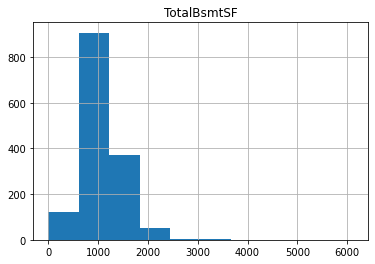

In [ ]:
# Regressor columns skewed - LotArea, MasVnrArea, GrLivArea, TotalBsmtSF
house.hist(column = "TotalBsmtSF")

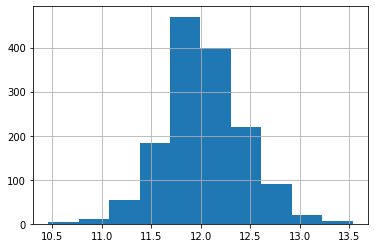

In [ ]:
# Log SalePrice
logsale = np.log(house["SalePrice"])
logsale.hist()

In [ ]:
# Label vs Features Space
X = house.drop(columns = "SalePrice")
y = house["SalePrice"]

In [ ]:
# Train/Test split
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [ ]:
# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(Xtrain)
X_test = scaler.transform(Xtest)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 32)
(1168,)
(292, 32)
(292,)


## Models

### KNN Regressor

In [ ]:
# Create HyperP dict
param_knn = {'n_neighbors': range(1,25)}
print("Parameter grid:\n{}".format(param_knn))

Parameter grid:
{'n_neighbors': range(1, 25)}


In [ ]:
# GridS/CrossV KNN - return best
knn = KNeighborsRegressor(weights = "uniform")
grid_knn = GridSearchCV(knn, param_knn, cv = 5, return_train_score = True)
grid_knn.fit(X_train, y_train)
print("Best parameters: {}".format(grid_knn.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_knn.score(X_test, y_test)))

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.7932


In [ ]:
# Coef of Determination
print(grid_knn.score(X_train, y_train))
print(grid_knn.score(X_test, y_test))

0.7997154115405692
0.7932478454859874


In [ ]:
knn_train_score = grid_knn.score(X_train, y_train)
knn_test_score = grid_knn.score(X_test, y_test)
model_results_knn = pd.DataFrame([['KNN', knn_train_score, knn_test_score]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_knn)
results=model_results_knn

  Model_GridCV  Train R^2  Test R^2
0          KNN   0.799715  0.793248


In [ ]:
# Display results table
results_knn = pd.DataFrame(grid_knn.cv_results_).sort_values(by='rank_test_score')
display(results_knn.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,0.002615,0.000020,0.013427,0.000302,10,{'n_neighbors': 10},0.760167,0.722920,0.695202,0.803645,0.789721,0.754331,0.040500,1,0.795674,0.790778,0.810383,0.790926,0.782346,0.794022,0.009240
8,0.002623,0.000031,0.013265,0.000353,9,{'n_neighbors': 9},0.763076,0.716958,0.705392,0.806413,0.779182,0.754204,0.037943,2,0.801686,0.794114,0.813035,0.799566,0.787066,0.799093,0.008611
15,0.002646,0.000048,0.014060,0.000414,16,{'n_neighbors': 16},0.764031,0.746980,0.690036,0.792920,0.774661,0.753726,0.035164,3,0.775514,0.781082,0.795061,0.774179,0.769720,0.779111,0.008761
14,0.002692,0.000057,0.014176,0.000133,15,{'n_neighbors': 15},0.762704,0.746388,0.690957,0.793527,0.774147,0.753545,0.034858,4,0.777029,0.782052,0.796490,0.776795,0.773812,0.781236,0.008073
13,0.002683,0.000047,0.013863,0.000081,14,{'n_neighbors': 14},0.763104,0.736365,0.687630,0.794688,0.779464,0.752250,0.037650,5,0.781374,0.783151,0.800735,0.780533,0.775193,0.784197,0.008684
16,0.002712,0.000101,0.013903,0.000387,17,{'n_neighbors': 17},0.760088,0.745420,0.685350,0.790793,0.773684,0.751067,0.036116,6,0.774586,0.779749,0.791685,0.771062,0.765477,0.776512,0.008898
17,0.002670,0.000045,0.013938,0.000171,18,{'n_neighbors': 18},0.759010,0.749820,0.682442,0.793489,0.769237,0.750800,0.037158,7,0.771982,0.777990,0.791183,0.767899,0.763239,0.774459,0.009667
10,0.002732,0.000128,0.013619,0.000168,11,{'n_neighbors': 11},0.752874,0.718343,0.691722,0.804562,0.786226,0.750745,0.041697,8,0.789646,0.787949,0.805198,0.784877,0.776638,0.788862,0.009313
12,0.002720,0.000124,0.013905,0.000296,13,{'n_neighbors': 13},0.757496,0.729598,0.687717,0.795338,0.781034,0.750237,0.038392,9,0.783284,0.785259,0.801823,0.783556,0.774771,0.785739,0.008832
11,0.002902,0.000512,0.014499,0.001689,12,{'n_neighbors': 12},0.749852,0.717804,0.692990,0.803171,0.786391,0.750042,0.041081,10,0.785857,0.786974,0.805231,0.780986,0.774032,0.786616,0.010366


Text(0, 0.5, 'CV Score')

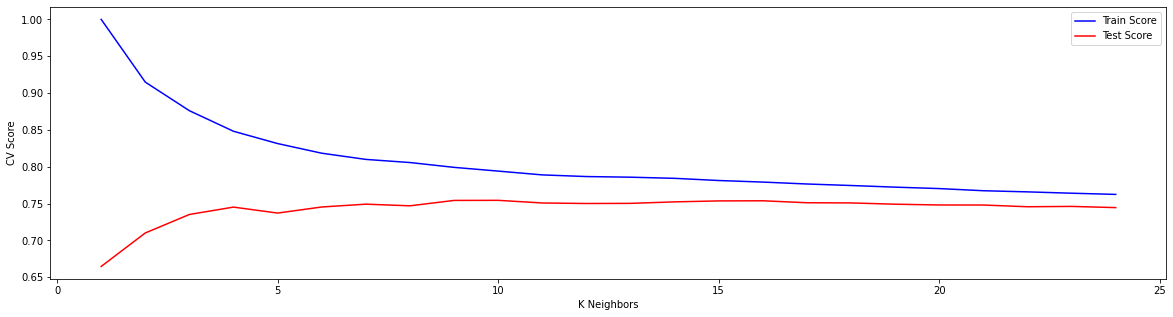

In [ ]:
# Plot CV Score
x_axis = range(1,25)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, grid_knn.cv_results_["mean_train_score"], c = 'b', label = 'Train Score')
plt.plot(x_axis, grid_knn.cv_results_["mean_test_score"], c = 'r', label = 'Test Score')
plt.legend()
plt.xlabel('K Neighbors')
plt.ylabel('CV Score')

### Linear Regression

In [ ]:
# Model and Eval
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linreg_train_score = linreg.score(X_train, y_train)
linreg_test_score = linreg.score(X_test, y_test)
model_results_linreg = pd.DataFrame([['Linear_Regress', linreg_train_score, linreg_test_score]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_linreg)
results = results.append(model_results_linreg, ignore_index = True)

     Model_GridCV  Train R^2  Test R^2
0  Linear_Regress   0.818131  0.840132


### Ridge Regression

In [ ]:
# Create HyperP dict
param_ridge = {'alpha': [0.0001,0.01, 0.1, 1, 10, 100, 500, 1000]}
print("Parameter grid:\n{}".format(param_ridge))

Parameter grid:
{'alpha': [0.0001, 0.01, 0.1, 1, 10, 100, 500, 1000]}


In [ ]:
# GridS/CrossV Ridge - return best
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_ridge, cv = 5, return_train_score = True)
grid_ridge.fit(X_train, y_train)
print("Best parameters: {}".format(grid_ridge.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_ridge.best_score_))

Best parameters: {'alpha': 100}
Best cross-validation score: 0.8005


In [ ]:
# Coef of Determination
print(grid_ridge.score(X_train, y_train))
print(grid_ridge.score(X_test, y_test))

0.8153848092241257
0.8357827038153115


In [ ]:
ridge_train_score = grid_ridge.score(X_train, y_train)
ridge_test_score = grid_ridge.score(X_test, y_test)
model_results_ridge = pd.DataFrame([['Ridge_Regress', ridge_train_score, ridge_test_score]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_ridge)
results = results.append(model_results_ridge, ignore_index = True)

    Model_GridCV  Train R^2  Test R^2
0  Ridge_Regress   0.815385  0.835783


In [ ]:
# Display results table
results_ridge = pd.DataFrame(grid_ridge.cv_results_).sort_values(by='rank_test_score')
display(results_ridge.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.002049,0.000702,0.000956,0.000093,100,{'alpha': 100},0.809649,0.758144,0.708743,0.861329,0.864854,0.800544,0.060231,1,0.812185,0.826986,0.841975,0.802805,0.802809,0.817352,0.015159
4,0.001693,0.000046,0.000940,0.000048,10,{'alpha': 10},0.814907,0.737545,0.708753,0.858239,0.870621,0.798013,0.064511,2,0.815628,0.831884,0.844853,0.806762,0.806151,0.821056,0.015096
3,0.002952,0.001067,0.001026,0.000061,1,{'alpha': 1},0.815358,0.733532,0.709013,0.856939,0.870960,0.797160,0.065068,3,0.815710,0.832014,0.844920,0.806864,0.806234,0.821148,0.015094
2,0.001804,0.000012,0.001037,0.000078,0.1,{'alpha': 0.1},0.815401,0.733088,0.709045,0.856786,0.870986,0.797061,0.065127,4,0.815711,0.832015,0.844921,0.806865,0.806235,0.821149,0.015094
1,0.001967,0.000125,0.001005,0.000044,0.01,{'alpha': 0.01},0.815405,0.733043,0.709048,0.856771,0.870989,0.797051,0.065133,5,0.815711,0.832015,0.844921,0.806865,0.806235,0.821149,0.015094
0,0.003471,0.003230,0.001179,0.000305,0.0001,{'alpha': 0.0001},0.815406,0.733038,0.709048,0.856769,0.870989,0.797050,0.065134,6,0.815711,0.832015,0.844921,0.806865,0.806235,0.821149,0.015094
6,0.001712,0.000196,0.000937,0.000109,500,{'alpha': 500},0.786708,0.781085,0.707902,0.845399,0.841448,0.792508,0.050030,7,0.795179,0.806182,0.824863,0.785155,0.787066,0.799689,0.014607
7,0.002527,0.001671,0.001113,0.000242,1000,{'alpha': 1000},0.760260,0.784349,0.697107,0.820876,0.817035,0.775925,0.045253,8,0.775617,0.783595,0.803031,0.765805,0.768754,0.779360,0.013330


### Lasso regression

In [ ]:
# Create HyperP dict
param_lasso = {'alpha': [0.0001,0.01, 0.1, 1, 10, 100, 500, 1000]}
print("Parameter grid:\n{}".format(param_lasso))

Parameter grid:
{'alpha': [0.0001, 0.01, 0.1, 1, 10, 100, 500, 1000]}


In [ ]:
# GridS/CrossV Lasso - return best
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, param_lasso, cv = 5, return_train_score = True)
grid_lasso.fit(X_train, y_train)
print("Best parameters: {}".format(grid_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_lasso.best_score_))

Best parameters: {'alpha': 500}
Best cross-validation score: 0.7993


In [ ]:
# Coef of Determination
print(grid_lasso.score(X_train, y_train))
print(grid_lasso.score(X_test, y_test))

0.8167840645899568
0.8392692295852558


In [ ]:
lasso_train_score = grid_lasso.score(X_train, y_train)
lasso_test_score = grid_lasso.score(X_test, y_test)
model_results_lasso = pd.DataFrame([['Lasso_Regress', lasso_train_score, lasso_test_score]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_lasso)
results = results.append(model_results_lasso, ignore_index = True)

    Model_GridCV  Train R^2  Test R^2
0  Lasso_Regress   0.816784  0.839269


In [ ]:
# Display results table
results_lasso = pd.DataFrame(grid_lasso.cv_results_).sort_values(by='rank_test_score')
display(results_lasso.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.002620,0.000050,0.000947,0.000009,500,{'alpha': 500},0.815716,0.744194,0.708237,0.858004,0.870355,0.799301,0.063393,1,0.813875,0.830056,0.844014,0.805017,0.804801,0.819553,0.015296
5,0.002849,0.000042,0.001022,0.000056,100,{'alpha': 100},0.815695,0.735765,0.708870,0.857168,0.871301,0.797760,0.064814,2,0.815632,0.831931,0.844872,0.806786,0.806144,0.821073,0.015106
7,0.002607,0.000037,0.000952,0.000024,1000,{'alpha': 1000},0.812389,0.748442,0.705047,0.853367,0.868444,0.797538,0.062177,3,0.811446,0.827857,0.842130,0.803058,0.803158,0.817530,0.015263
4,0.010860,0.007270,0.001131,0.000087,10,{'alpha': 10},0.815444,0.733343,0.709020,0.856810,0.871028,0.797129,0.065100,4,0.815710,0.832014,0.844920,0.806864,0.806234,0.821149,0.015094
3,0.022966,0.014626,0.001159,0.000085,1,{'alpha': 1},0.815408,0.733069,0.709044,0.856775,0.870993,0.797058,0.065131,5,0.815711,0.832015,0.844921,0.806865,0.806235,0.821149,0.015094
2,0.032302,0.006320,0.001221,0.000015,0.1,{'alpha': 0.1},0.815406,0.733041,0.709048,0.856769,0.870989,0.797051,0.065134,6,0.815711,0.832015,0.844921,0.806865,0.806235,0.821149,0.015094
1,0.038747,0.003800,0.001241,0.000077,0.01,{'alpha': 0.01},0.815406,0.733038,0.709048,0.856769,0.870989,0.797050,0.065134,7,0.815711,0.832015,0.844921,0.806865,0.806235,0.821149,0.015094
0,0.042281,0.008326,0.001358,0.000173,0.0001,{'alpha': 0.0001},0.815406,0.733038,0.709048,0.856769,0.870989,0.797050,0.065134,8,0.815711,0.832015,0.844921,0.806865,0.806235,0.821149,0.015094


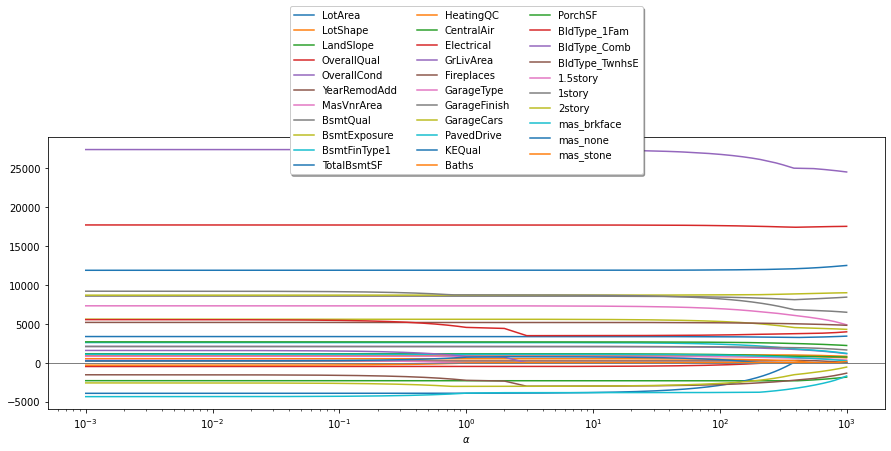

In [ ]:
# Regularization Effects and Feature Importance
x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

plt.subplots(figsize = (15,5))
for i in range(0,32):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

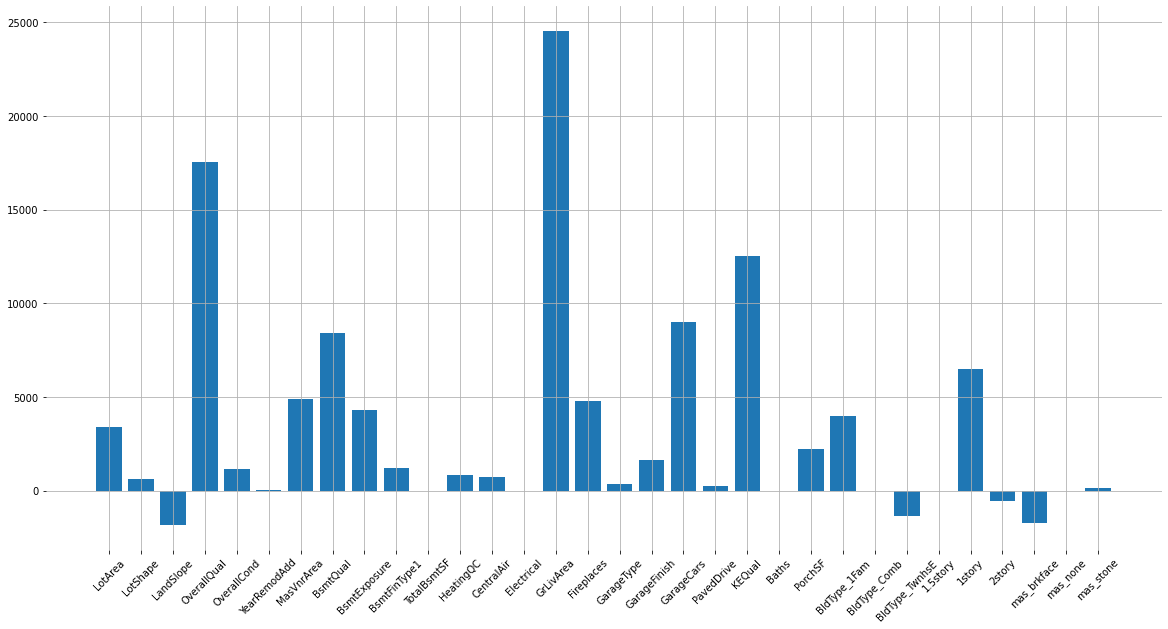

In [ ]:
# Feature Importance
plt.subplots(figsize = (20,10))
plt.style.use('ggplot')
plt.bar(range(32), lasso.coef_)
plt.box(False)
plt.xticks(range(32), X.columns, rotation = 45)
plt.grid()

### Polynomial Regression

In [ ]:
linreg = LinearRegression()
polyr = PolynomialFeatures(degree = 2)
polyr_train = polyr.fit_transform(X_train)
linreg.fit(polyr_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Polynomial transform
polyr_test = polyr.transform(X_test)

In [ ]:
polyr_train_score = linreg.score(polyr_train, y_train)
polyr_test_score = linreg.score(polyr_test, y_test)
model_results_polyr = pd.DataFrame([['Poly_Regress', polyr_train_score, polyr_test_score]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_polyr)
results = results.append(model_results_polyr, ignore_index = True)

   Model_GridCV  Train R^2  Test R^2
0  Poly_Regress   0.947065  0.790461


### SVM

#### LinearSVR

In [ ]:
# GridS/CrossV LinearSVR - return best
linsvr = LinearSVR()
grid_linsvr = GridSearchCV(linsvr, {'C': [0.001, 0.01, 1, 10, 100, 1000, 2000, 5000]}, cv = 5, return_train_score = True)
grid_linsvr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_linsvr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_linsvr.best_score_))

Best parameters: {'C': 5000}
Best cross-validation score: 0.8023


In [ ]:
linsvr_train_score = grid_linsvr.score(X_train, y_train)
linsvr_test_score = grid_linsvr.score(X_test, y_test)
model_results_linsvr = pd.DataFrame([['LinearSVR', linsvr_train_score, linsvr_test_score]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_linsvr)
results = results.append(model_results_linsvr, ignore_index = True)

  Model_GridCV  Train R^2  Test R^2
0    LinearSVR   0.801686  0.830113


#### Linear Kernel

In [ ]:
# GridS/CrossV Linear kernel - return best
lin = SVR(kernel = "linear")
grid_lin = GridSearchCV(lin, {'C': [0.001, 0.01, 1, 10, 100, 1000, 2000, 5000]}, cv = 5, return_train_score = True)
grid_lin.fit(X_train, y_train)
print("Best parameters: {}".format(grid_lin.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_lin.best_score_))

Best parameters: {'C': 5000}
Best cross-validation score: 0.8017


In [ ]:
# Coef of Determination
print(grid_lin.score(X_train, y_train))
print(grid_lin.score(X_test, y_test))

0.8019806675872568
0.8313196404950776


In [ ]:
linear_kernel_train_score = grid_lin.score(X_train, y_train)
linear_kernel_test_score = grid_lin.score(X_test, y_test)
model_results_linear_kernel = pd.DataFrame([['Linear_kernel', linear_kernel_train_score, linear_kernel_test_score]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_linear_kernel)
results = results.append(model_results_linear_kernel, ignore_index = True)

    Model_GridCV  Train R^2  Test R^2
0  Linear_kernel   0.801981   0.83132


In [ ]:
# Display results table
results_lin = pd.DataFrame(grid_lin.cv_results_).sort_values(by='rank_test_score')
display(results_lin.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,0.555112,0.427932,0.008806,0.000273,5000,{'C': 5000},0.827841,0.750670,0.695274,0.866653,0.868066,0.801701,0.068172,1,0.795953,0.813048,0.836324,0.786911,0.788182,0.804084,0.018621
5,0.105554,0.011481,0.008688,0.000203,1000,{'C': 1000},0.822594,0.756986,0.696776,0.864445,0.866364,0.801433,0.065670,2,0.795381,0.811063,0.835008,0.784970,0.787490,0.802783,0.018509
6,0.268934,0.140547,0.008468,0.000071,2000,{'C': 2000},0.825817,0.753555,0.695746,0.864485,0.866939,0.801308,0.066818,3,0.796524,0.812276,0.836176,0.785956,0.787916,0.803770,0.018675
4,0.084548,0.001540,0.009209,0.000826,100,{'C': 100},0.773578,0.771372,0.687183,0.832159,0.813764,0.775611,0.049990,4,0.776523,0.776747,0.799982,0.759336,0.760361,0.774590,0.014753
3,0.067832,0.002314,0.008979,0.000318,10,{'C': 10},0.531955,0.585912,0.526467,0.598341,0.586651,0.565865,0.030301,5,0.571341,0.551965,0.581881,0.558660,0.562418,0.565253,0.010408
2,0.069090,0.002958,0.008821,0.000282,1,{'C': 1},0.063679,0.021748,0.090663,0.090360,0.075516,0.068393,0.025406,6,0.075987,0.065884,0.075988,0.071987,0.078250,0.073619,0.004363
1,0.066275,0.000917,0.008919,0.000398,0.01,{'C': 0.01},-0.045241,-0.112437,-0.014455,-0.031375,-0.052798,-0.051261,0.033260,7,-0.044148,-0.045383,-0.044322,-0.047166,-0.042077,-0.044619,0.001664
0,0.073757,0.006872,0.008904,0.000420,0.001,{'C': 0.001},-0.046085,-0.113926,-0.015461,-0.032669,-0.054185,-0.052465,0.033414,8,-0.045092,-0.046573,-0.045456,-0.048450,-0.043358,-0.045786,0.001685


#### RBF Kernel

In [ ]:
# Create HyperP dict
param_rbf = {'C': [0.001, 0.01, 1, 10, 100, 1000, 2000, 5000], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_rbf))

Parameter grid:
{'C': [0.001, 0.01, 1, 10, 100, 1000, 2000, 5000], 'gamma': [0.001, 0.01, 0.1, 1, 10]}


In [ ]:
# GridS/CrossV RBF kernel - return best
rbf = SVR(kernel = "rbf")
grid_rbf = GridSearchCV(rbf, param_rbf, cv = 5, return_train_score = True)
grid_rbf.fit(X_train, y_train)
print("Best parameters: {}".format(grid_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_rbf.best_score_))

Best parameters: {'C': 5000, 'gamma': 0.01}
Best cross-validation score: 0.7504


In [ ]:
# Coef of Determination
print(grid_rbf.score(X_train, y_train))
print(grid_rbf.score(X_test, y_test))

0.7733484864342128
0.7382634015596544


In [ ]:
rbf_train_score = grid_rbf.score(X_train, y_train)
rbf_test_score = grid_rbf.score(X_test, y_test)
model_results_rbf = pd.DataFrame([['RBF_kernel', rbf_train_score, rbf_test_score]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_rbf)
results = results.append(model_results_rbf, ignore_index = True)

  Model_GridCV  Train R^2  Test R^2
0   RBF_kernel   0.773348  0.738263


#### Polynomial Kernel

In [ ]:
# Create HyperP dict
param_poly = {'C': [0.001, 0.01, 1, 10, 1000], 'gamma': [0.01, 0.1, 1, 10], 'coef0': [1]}
print("Parameter grid:\n{}".format(param_poly))

Parameter grid:
{'C': [0.001, 0.01, 1, 10, 1000], 'gamma': [0.01, 0.1, 1, 10], 'coef0': [1]}


In [ ]:
# GridS/CrossV Poly kernel - return best
poly = SVR(kernel = "poly", degree = 3)
grid_poly = GridSearchCV(poly, param_poly, cv = 5, return_train_score = True)
grid_poly.fit(X_train, y_train)
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))

Best parameters: {'C': 1, 'coef0': 1, 'gamma': 1}
Best cross-validation score: 0.8006


In [ ]:
# Coef of Determination
print(grid_poly.score(X_train, y_train))
print(grid_poly.score(X_test, y_test))

0.9259124394463977
0.8889131225097289


In [ ]:
poly_train_score = grid_poly.score(X_train, y_train)
poly_test_score = grid_poly.score(X_test, y_test)
model_results_poly = pd.DataFrame([['Poly_kernel', poly_train_score, poly_test_score]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_poly)
results = results.append(model_results_poly, ignore_index = True)

  Model_GridCV  Train R^2  Test R^2
0  Poly_kernel   0.925912  0.888913


### Decision Tree Regressor

In [ ]:
# Create HyperP dict
param_tree = {'max_depth': [5, 10, 20, 50], 'min_samples_split': [2, 5, 10, 20]}
print("Parameter grid:\n{}".format(param_tree))

Parameter grid:
{'max_depth': [5, 10, 20, 50], 'min_samples_split': [2, 5, 10, 20]}


In [ ]:
# GridS/CrossV Decision Tree - return best
tree = DecisionTreeRegressor(random_state = 0)
grid_tree = GridSearchCV(tree, param_tree, cv = 5, return_train_score = True)
grid_tree.fit(X_train, y_train)
print("Best parameters: {}".format(grid_tree.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_tree.score(X_test, y_test)))

Best parameters: {'max_depth': 20, 'min_samples_split': 20}
Best cross-validation score: 0.8466


In [ ]:
tree_train_score = grid_tree.score(X_train, y_train)
tree_test_score = grid_tree.score(X_test, y_test)
model_results_tree = pd.DataFrame([['Decision_tree', tree_train_score, tree_test_score]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_tree)
results = results.append(model_results_tree, ignore_index = True)

    Model_GridCV  Train R^2  Test R^2
0  Decision_tree   0.910911  0.846577


Text(0, 0.5, 'House Price')

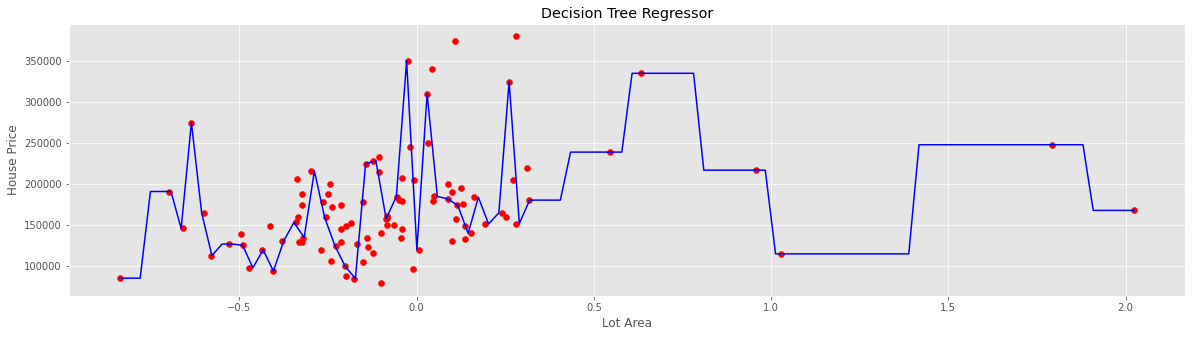

In [ ]:
# Regress Price by Lot Area
xx = X_train[:100,0].reshape(-1,1)
yy = y_train[:100]
tree.fit(xx, yy)

X_new = np.linspace(xx.min(), xx.max(), 100).reshape(100, 1)
y_predict = tree.predict(X_new)

plt.subplots(figsize = (20,5))
plt.plot(X_new, y_predict, c = "b")
plt.scatter(xx, yy, color = "r")
plt.title("Decision Tree Regressor")
plt.xlabel("Lot Area")
plt.ylabel("House Price")

## Final Model

**The analysis in Project 1 compares 10 different regressor models to the transformed House Prices data set.  The KNN model produced the most balanced r^2 across both the test and train sets, which implies the least overfitting, but the r^2 was also the lowest. Certain models, such as SVR with a linear kernel, Ridge, and Lasso regression produced basically the same r^2 with slightly higher test r^2. The SVR with RBF kernel, and SVR with polynomial kernel all produced higher r^2 on the train set.  The conclusion is that they overfit the train set and don't generalize well.  The Polynomial Regressor substantially overfits the train set and predicts the price with a r^2 fifteen percentage points above the test set.  The final model selected is the SVR with polynomial kernel with hyperparameters {C = 1, gamma = 1, degree = 3}. This model predicted the train r^2 at nearly 92.6 percent without substantially overfitting the data. The test r^2 remained high at 88.9 percent.**

In [ ]:
# Table of Coefficients of Determination - all models
print(results)

     Model_GridCV  Train R^2  Test R^2
0             KNN   0.799715  0.793248
1  Linear_Regress   0.818131  0.840132
2   Ridge_Regress   0.815385  0.835783
3   Lasso_Regress   0.816784  0.839269
4    Poly_Regress   0.947065  0.790461
5       LinearSVR   0.801686  0.830113
6   Linear_kernel   0.801981  0.831320
7      RBF_kernel   0.773348  0.738263
8     Poly_kernel   0.925912  0.888913
9   Decision_tree   0.910911  0.846577


In [ ]:
final = SVR(kernel = "poly", C = 1, gamma = 1, degree = 3)
final.fit(X_train, y_train)
final_pred = final.predict(X_test)

# Coef of Determination
print(final.score(X_train, y_train))
print(final.score(X_test, y_test))
print(np.round(np.sqrt(mean_squared_error(y_test, final_pred)), 2))

0.9193663717370952
0.884460797583498
29769.5


# **Project 2**

**The analysis in Project 2 utilizes the same preprocessed data set and the best model parameters found using GridSearchCV in Project 1, for the ensembles. The grid search is conducted on the ensemble hyperparameters in order to find the best fitting models. A second results table is created that is compared to the evaluation table in Project 1.**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
import tensorflow as tf
import keras

## Bagging - OOB

### Ridge Regress

In [ ]:
param_ridge_bag = {'n_estimators': [200, 500, 1000], 'max_samples': [100, 200, 500]}
print("Parameter grid:\n{}".format(param_ridge_bag))

ridge_bag = Ridge(alpha = 100)
ridge_bag_clf = BaggingRegressor(ridge_bag, bootstrap = True, random_state=0, oob_score = True)


grid_ridge_bag_clf = GridSearchCV(ridge_bag_clf, param_ridge_bag, cv = 5, return_train_score = True)
grid_ridge_bag_clf.fit(X_train, y_train)
print("Best parameters: {}".format(grid_ridge_bag_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_ridge_bag_clf.score(X_test, y_test)))

grid_ridge_bag_pred = grid_ridge_bag_clf.predict(X_test)

Parameter grid:
{'n_estimators': [200, 500, 1000], 'max_samples': [100, 200, 500]}
Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.8308


In [ ]:
grid_ridge_bag_train_score = grid_ridge_bag_clf.score(X_train, y_train)
grid_ridge_bag_test_score = grid_ridge_bag_clf.score(X_test, y_test)
rmse_grid_ridge_bag = np.round(np.sqrt(mean_squared_error(y_test, grid_ridge_bag_pred)), 2)


model_results2_grid_ridge_bag = pd.DataFrame([['Grid_ridge_bag', grid_ridge_bag_train_score, grid_ridge_bag_test_score,
                                        rmse_grid_ridge_bag]],
               columns = ['Model', 'Train R^2', 'Test R^2', "RMSE"])

print(model_results2_grid_ridge_bag)
results2 = model_results2_grid_ridge_bag

            Model  Train R^2  Test R^2      RMSE
0  Grid_ridge_bag   0.810178  0.830793  36025.97


### SVR Poly Kernel

In [ ]:
param_poly_bag = {'n_estimators': [200, 500, 1000], 'max_samples': [100, 200, 500]}
print("Parameter grid:\n{}".format(param_poly_bag))

poly_bag = SVR(kernel = "poly", C = 1, gamma = 1, degree = 3)
poly_bag_clf = BaggingRegressor(poly_bag, bootstrap=True, random_state=0, oob_score = True)

grid_poly_bag_clf = GridSearchCV(poly_bag_clf, param_poly_bag, cv = 5, return_train_score = True)
grid_poly_bag_clf.fit(X_train, y_train)
print("Best parameters: {}".format(grid_poly_bag_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly_bag_clf.score(X_test, y_test)))

grid_poly_bag_pred = grid_poly_bag_clf.predict(X_test)

Parameter grid:
{'n_estimators': [200, 500, 1000], 'max_samples': [100, 200, 500]}
Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.8874


In [ ]:
grid_poly_bag_train_score = grid_poly_bag_clf.score(X_train, y_train)
grid_poly_bag_test_score = grid_poly_bag_clf.score(X_test, y_test)
rmse_grid_poly_bag = np.round(np.sqrt(mean_squared_error(y_test, grid_poly_bag_pred)), 2)

model_results2_grid_poly_bag = pd.DataFrame([['Grid_polyKernel_bag', grid_poly_bag_train_score, grid_poly_bag_test_score, rmse_grid_poly_bag]],
               columns = ['Model', 'Train R^2', 'Test R^2', "RMSE"])

print(model_results2_grid_poly_bag)
results2 = results2.append(model_results2_grid_poly_bag, ignore_index = True)

                 Model  Train R^2  Test R^2      RMSE
0  Grid_polyKernel_bag   0.799054  0.887384  29390.44


## Pasting

### SVR RBF Kernel

In [ ]:
param_rbf_paste = {'n_estimators': [200, 500, 1000], 'max_samples': [100, 200, 500]}
print("Parameter grid:\n{}".format(param_rbf_paste))

rbf_paste = SVR(kernel = "rbf", C = 5000, gamma = 0.01)
rbf_paste_clf = BaggingRegressor(rbf_paste, bootstrap=False, random_state=0, oob_score = False)

grid_rbf_paste_clf = GridSearchCV(rbf_paste_clf, param_rbf_paste, cv = 5, return_train_score = True)
grid_rbf_paste_clf.fit(X_train, y_train)
print("Best parameters: {}".format(grid_rbf_paste_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_rbf_paste_clf.score(X_test, y_test)))

grid_rbf_paste_pred = grid_rbf_paste_clf.predict(X_test)

Parameter grid:
{'n_estimators': [200, 500, 1000], 'max_samples': [100, 200, 500]}
Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.6387


In [ ]:
grid_rbf_paste_train_score = grid_rbf_paste_clf.score(X_train, y_train)
grid_rbf_paste_test_score = grid_rbf_paste_clf.score(X_test, y_test)
rmse_grid_rbf_paste = np.round(np.sqrt(mean_squared_error(y_test, grid_rbf_paste_pred)), 2)
model_results2_grid_rbf_paste = pd.DataFrame([['Grid_RBFKernel_paste', grid_rbf_paste_train_score, grid_rbf_paste_test_score,
                                         rmse_grid_rbf_paste]], columns = ['Model', 'Train R^2', 'Test R^2', "RMSE"])

print(model_results2_grid_rbf_paste)
results2 = results2.append(model_results2_grid_rbf_paste, ignore_index = True)

                  Model  Train R^2  Test R^2      RMSE
0  Grid_RBFKernel_paste   0.678729  0.638672  52645.09


### KNN Regress

In [ ]:
param_knn_paste = {'n_estimators': [200, 500, 1000], 'max_samples': [100, 200, 500]}
print("Parameter grid:\n{}".format(param_knn_paste))

knn_paste = KNeighborsRegressor(weights = "uniform", n_neighbors = 10)
knn_paste_clf = BaggingRegressor(knn_paste, bootstrap=False, random_state=0, oob_score = False)

grid_knn_paste_clf = GridSearchCV(knn_paste_clf, param_knn_paste, cv = 5, return_train_score = True)
grid_knn_paste_clf.fit(X_train, y_train)
print("Best parameters: {}".format(grid_knn_paste_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_knn_paste_clf.score(X_test, y_test)))

grid_knn_paste_pred = grid_knn_paste_clf.predict(X_test)

Parameter grid:
{'n_estimators': [200, 500, 1000], 'max_samples': [100, 200, 500]}
Best parameters: {'max_samples': 500, 'n_estimators': 200}
Best cross-validation score: 0.7518


In [ ]:
grid_knn_paste_train_score = grid_knn_paste_clf.score(X_train, y_train)
grid_knn_paste_test_score = grid_knn_paste_clf.score(X_test, y_test)
rmse_grid_knn_paste = np.round(np.sqrt(mean_squared_error(y_test, grid_knn_paste_pred)), 2)
model_results2_grid_knn_paste = pd.DataFrame([['Grid_KNN_paste', grid_knn_paste_train_score, grid_knn_paste_test_score,
                                         rmse_grid_knn_paste]], columns = ['Model', 'Train R^2', 'Test R^2', "RMSE"])

print(model_results2_grid_knn_paste)
results2 = results2.append(model_results2_grid_knn_paste, ignore_index = True)

            Model  Train R^2  Test R^2      RMSE
0  Grid_KNN_paste   0.769963  0.751761  43635.73


## AdaBoost

### SVR Poly Kernel

In [ ]:
param_ada_poly = {'learning_rate': [0.1, 0.01]}
print("Parameter grid:\n{}".format(param_ada_poly))

ada_poly = SVR(kernel = "poly", C = 1, gamma = 1, degree = 3)
ada_poly_clf = AdaBoostRegressor(ada_poly, n_estimators = 500, loss = 'linear', random_state = 0)

grid_ada_poly_clf = GridSearchCV(ada_poly_clf, param_ada_poly, cv = 5, return_train_score = True)
grid_ada_poly_clf.fit(X_train, y_train)
print("Best parameters: {}".format(grid_ada_poly_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_ada_poly_clf.score(X_test, y_test)))

grid_ada_poly_pred = grid_ada_poly_clf.predict(X_test)

Parameter grid:
{'learning_rate': [0.1, 0.01]}
Best parameters: {'learning_rate': 0.01}
Best cross-validation score: 0.8881


In [ ]:
ada_poly_train_score = grid_ada_poly_clf.score(X_train, y_train)
ada_poly_test_score = grid_ada_poly_clf.score(X_test, y_test)
rmse_grid_ada_poly = np.round(np.sqrt(mean_squared_error(y_test, grid_ada_poly_pred)), 2)
model_results2_grid_ada_poly = pd.DataFrame([['Grid_PolyKernel_Ada', ada_poly_train_score, ada_poly_test_score, rmse_grid_ada_poly]],
               columns = ['Model', 'Train R^2', 'Test R^2', "RMSE"])


print(model_results2_grid_ada_poly)
results2 = results2.append(model_results2_grid_ada_poly, ignore_index = True)

                 Model  Train R^2  Test R^2     RMSE
0  Grid_PolyKernel_Ada   0.955522   0.88808  29299.6


### LinearSVR

In [ ]:
param_ada_linsvr = {'n_estimators': [200, 500, 1000], 'learning_rate': [0.1, 0.001, 0.0001]}
print("Parameter grid:\n{}".format(param_ada_linsvr))

ada_linsvr = LinearSVR(C = 5000)
ada_linsvr_clf = AdaBoostRegressor(ada_linsvr, loss = 'linear', random_state = 0)

grid_ada_linsvr_clf = GridSearchCV(ada_linsvr_clf, param_ada_linsvr, cv = 5, return_train_score = True)
grid_ada_linsvr_clf.fit(X_train, y_train)
print("Best parameters: {}".format(grid_ada_linsvr_clf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_ada_linsvr_clf.score(X_test, y_test)))

grid_ada_linsvr_pred = grid_ada_linsvr_clf.predict(X_test)

Parameter grid:
{'n_estimators': [200, 500, 1000], 'learning_rate': [0.1, 0.001, 0.0001]}
Best parameters: {'learning_rate': 0.001, 'n_estimators': 500}
Best cross-validation score: 0.8319


In [ ]:
grid_ada_linsvr_train_score = grid_ada_linsvr_clf.score(X_train, y_train)
grid_ada_linsvr_test_score = grid_ada_linsvr_clf.score(X_test, y_test)
rmse_ada_linsvr = np.round(np.sqrt(mean_squared_error(y_test, grid_ada_linsvr_pred)), 2)
model_results2_ada_linsvr = pd.DataFrame([['Grid_linearSVR_Ada', grid_ada_linsvr_train_score, grid_ada_linsvr_test_score,
                                           rmse_ada_linsvr]], columns = ['Model', 'Train R^2', 'Test R^2', "RMSE"])

print(model_results2_ada_linsvr)
results2 = results2.append(model_results2_ada_linsvr, ignore_index = True)

                Model  Train R^2  Test R^2      RMSE
0  Grid_linearSVR_Ada   0.804378  0.831931  35904.66


## Gradient Boosting

In [ ]:
param_gboost = {'max_depth': [2, 3, 5], 'n_estimators': [200, 500, 1000, 1500], 'learning_rate': [0.1, 0.015, 0.001, 0.0001]}
print("Parameter grid:\n{}".format(param_gboost))

gboost = GradientBoostingRegressor(loss = 'ls', criterion = 'friedman_mse', random_state = 42)

grid_gboost = GridSearchCV(gboost, param_gboost, cv = 5, return_train_score = True)
grid_gboost.fit(X_train, y_train)
print("Best parameters: {}".format(grid_gboost.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_gboost.score(X_test, y_test)))

grid_gboost_pred = grid_gboost.predict(X_test)

Parameter grid:
{'max_depth': [2, 3, 5], 'n_estimators': [200, 500, 1000, 1500], 'learning_rate': [0.1, 0.015, 0.001, 0.0001]}
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation score: 0.9197


In [ ]:
gboost_train_score = grid_gboost.score(X_train, y_train)
gboost_test_score = grid_gboost.score(X_test, y_test)
rmse_gboost = np.round(np.sqrt(mean_squared_error(y_test, grid_gboost_pred)), 2)
model_results2_gboost = pd.DataFrame([['Grad_Boost', gboost_train_score, gboost_test_score, rmse_gboost]],
                                     columns = ['Model', 'Train R^2', 'Test R^2', "RMSE"])

print(model_results2_gboost)
results2 = results2.append(model_results2_gboost, ignore_index = True)

        Model  Train R^2  Test R^2      RMSE
0  Grad_Boost   0.970835  0.919681  24820.77


## PCA

**For the principal components analysis section, the original data set is reimported in order to allow the algorithm to perform the dimension reduction and handle the collinearity in the data.  However, there are certain variables that were again removed.  First, there are variables associated with the sale of the property and incorporate feature leakage. Second, certain columns such as Heating are composed almost entirely of a single category.  Also, some columns contain mostly missing values and would have no reasonable method of imputation. These columns are removed, but many of the original columns that were removed in Project 1 are now retained, and one-hot and mapping transformations are performed on these variables. The same missing values imputation and scaling transformation from Project 1 is used, and we select 95 as the percentage of information retention for the PCA transformation. There are 110 columns in the preprocessed set for Project 2 and 74 features created by the PCA. This number is more than twice the number of columns generated in Project 1. All of the original models are trained again using the new PCA features, and a GridSearchCV is performed on them in case the optimal hyperparameters change given the new data.**

### New Data

In [ ]:
# Load data
house_pca = pd.read_csv("train.csv")

### Drop Columns & Handle NA

In [ ]:
# Drop columns
house_pca.drop(columns = ["Id", "Alley", "FireplaceQu", "PoolQC", "MiscFeature", "Fence", "YrSold", "SaleType",
                      "SaleCondition", "MoSold", "LotFrontage", "BsmtCond", "BsmtFinType2", "GarageQual", "GarageCond",
                     "YearBuilt", "RoofMatl", "Heating", "LowQualFinSF", "Utilities", "Condition2", "Neighborhood",
                     "GarageYrBlt", "PoolArea", "Street", "Functional", "MiscVal", "Exterior2nd"], inplace = True)

In [ ]:
# Bsmt exposure NA, but has bsmt - Replace Bsmts' NA with None
# house[house["BsmtExposure"].isnull()]
house_pca.fillna({"BsmtQual": "None", "BsmtExposure": "None", "BsmtFinType1": "None"}, inplace=True)

In [ ]:
# Replace NA with None
house_pca.fillna({"GarageType": "None", "GarageFinish": "None"}, inplace=True)

In [ ]:
# Electrical missing 1, standard house - replace with
# house[house["Electrical"].isnull()]
house_pca["Electrical"].fillna(value = "SBrkr", inplace = True)

In [ ]:
# Examine Mas NA
house_pca[house_pca["MasVnrType"].isnull()]
house_pca["MasVnrType"].fillna(value = "Uncertain", inplace = True)

In [ ]:
# NA treated as not having Vnr
house_pca["MasVnrArea"].fillna(value = 0, inplace = True)

### One Hot

In [ ]:
# Combine Building Type 3 cats
house_pca.replace({"BldgType": {"2fmCon": "Comb", "Duplex": "Comb", "Twnhs": "Comb"}}, inplace = True)
house_pca = house_pca.join(pd.get_dummies(house_pca["BldgType"], prefix = "BldType", dtype = float))
house_pca.drop(columns = "BldgType", inplace = True)

In [ ]:
# Combine House Style by Story - cannot replace key with same value
house_pca.replace({"HouseStyle": {"2Story": "2story", "2.5Unf": "2story", "2.5Fin": "2story", "SLvl": "2story",
                              "1Story": "1story", "1.5Fin": "1.5story", "1.5Unf": "1.5story", "SFoyer": "1.5story"}},
              inplace = True)
house_pca = house_pca.join(pd.get_dummies(house_pca["HouseStyle"], dtype = float))
house_pca.drop(columns = "HouseStyle", inplace = True)

In [ ]:
# Combine Building Type 3 cats
house_pca.replace({"MasVnrType": {"BrkFace": "brkface", "Stone": "stone", "None": "none", "BrkCmn": "none",
                             "Uncertain": "none"}}, inplace = True)
house_pca = house_pca.join(pd.get_dummies(house_pca["MasVnrType"], prefix = "mas", dtype = float))
house_pca.drop(columns = "MasVnrType", inplace = True)

In [ ]:
house_pca = house_pca.join(pd.get_dummies(house_pca["LandContour"], prefix = "Land", dtype = float))
house_pca.drop(columns = "LandContour", inplace = True)

In [ ]:
house_pca = house_pca.join(pd.get_dummies(house_pca["MSZoning"], prefix = "Zone", dtype = float))
house_pca.drop(columns = "MSZoning", inplace = True)

In [ ]:
house_pca = house_pca.join(pd.get_dummies(house_pca["Foundation"], prefix = "Fnd", dtype = float))
house_pca.drop(columns = "Foundation", inplace = True)

In [ ]:
house_pca = house_pca.join(pd.get_dummies(house_pca["MSSubClass"], prefix = "Sub", dtype = float))
house_pca.drop(columns = "MSSubClass", inplace = True)

In [ ]:
house_pca = house_pca.join(pd.get_dummies(house_pca["Exterior1st"], prefix = "Ext1", dtype = float))
house_pca.drop(columns = "Exterior1st", inplace = True)

In [ ]:
house_pca = house_pca.join(pd.get_dummies(house_pca["LotConfig"], prefix = "Lot", dtype = float))
house_pca.drop(columns = "LotConfig", inplace = True)

In [ ]:
house_pca = house_pca.join(pd.get_dummies(house_pca["RoofStyle"], prefix = "Roof", dtype = float))
house_pca.drop(columns = "RoofStyle", inplace = True)

In [ ]:
house_pca = house_pca.join(pd.get_dummies(house_pca["Condition1"], prefix = "Con1", dtype = float))
house_pca.drop(columns = "Condition1", inplace = True)

### Map & Combine

In [ ]:
# Separate keys for same value
house_pca["LotShape"] = house_pca["LotShape"].map({"IR1": 1, "IR2": 1, "IR3": 1, "Reg" : 0}).astype("int64")

In [ ]:
house_pca["LandSlope"] = house_pca["LandSlope"].map({"Mod": 0, "Sev": 0, "Gtl": 1}).astype("int64")

In [ ]:
# Don't use quotes for numerical column names
house_pca["OverallQual"] = house_pca["OverallQual"].map({1: 1, 2: 1, 3: 1, 4: 2, 5: 3,
                                                 6: 4, 7: 5, 8: 6, 9: 7, 10: 8}).astype("int64")

In [ ]:
# Combine cat (1-4) & (5-9)
house_pca["OverallCond"] = house_pca["OverallCond"].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 1,
                                                 6: 1, 7: 1, 8: 1, 9: 1}).astype("int64")

In [ ]:
# Combine K/E Quality vars, map cats, average, and drop
house_pca["KitchenQual"] = house_pca["KitchenQual"].map({"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}).astype("int64")
house_pca["ExterQual"] = house_pca["ExterQual"].map({"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}).astype("int64")
house_pca["KEQual"] = house_pca[["ExterQual", "KitchenQual"]].mean(axis = 1)
house_pca.drop(columns = ['ExterQual', "KitchenQual"], axis = 1, inplace = True)

In [ ]:
house_pca["CentralAir"] = house_pca["CentralAir"].map({"Y": 1, "N": 0}).astype("int64")

In [ ]:
# Combine Ex & (Gd/TA) & (Fa/Po)
house_pca["HeatingQC"] = house_pca["HeatingQC"].map({"Ex": 3, "Gd": 2, "TA": 2, "Fa": 1, "Po" : 1}).astype("int64")

In [ ]:
# Combine N&P
house_pca["PavedDrive"] = house_pca["PavedDrive"].map({"Y": 1, "N": 0, "P": 0}).astype("int64")

In [ ]:
# Combine 2&3
house_pca["Fireplaces"] = house_pca["Fireplaces"].map({0: 1, 1: 2, 2: 3, 3: 3}).astype("int64")

In [ ]:
# Combine cat 0&1, 2&4 - similar distribution
house_pca["GarageCars"] = house_pca["GarageCars"].map({0: 1, 1: 1, 2: 2, 3: 3, 4: 2}).astype("int64")

In [ ]:
# Combine baths Abv Ground
house_pca["Baths"] = house_pca["FullBath"] + (house_pca["HalfBath"]/2)
house_pca.drop(['FullBath', "HalfBath"], axis = 1, inplace = True)

In [ ]:
# Combine Total Porch/Deck SF
house_pca["PorchSF"] = house_pca["WoodDeckSF"] + house_pca["OpenPorchSF"] + house_pca["EnclosedPorch"] + house_pca["3SsnPorch"] + house_pca["ScreenPorch"]
house_pca.drop(columns = ["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"], inplace = True)

In [ ]:
# Combine Fa/None(no bsmt)
house_pca["BsmtQual"] = house_pca["BsmtQual"].map({"Ex": 3, "Gd": 2, "TA": 1, "Fa": 0, "None": 0}).astype("int64")

In [ ]:
# Combine Gd/Av, Mn/No(no exp), None(no bsmt)
house_pca["BsmtExposure"] = house_pca["BsmtExposure"].map({"Gd": 2, "Av": 2, "Mn": 1, "No": 1, "None": 0}).astype("int64")

In [ ]:
# Combine cats with similar distributions
house_pca["BsmtFinType1"] = house_pca["BsmtFinType1"].map({"GLQ": 3, "ALQ": 2, "Unf": 2, "Rec": 1, "BLQ": 1, "LwQ": 1,
                                                  "None": 0}).astype("int64")

In [ ]:
# Binary map
house_pca["Electrical"] = house_pca["Electrical"].map({"SBrkr": 1, "FuseF": 0, "FuseA": 0, "FuseP": 0, "Mix": 0}).astype("int64")

In [ ]:
# Combine Unf/None
house_pca["GarageFinish"] = house_pca["GarageFinish"].map({"Fin": 2, "RFn": 1, "Unf": 0, "None": 0}).astype("int64")

In [ ]:
# Combine cats w/similar dist
house_pca["GarageType"] = house_pca["GarageType"].map({"Attchd": 2, "BuiltIn": 2, "Detchd": 1, "2Types": 0, "Basment": 1,
                                              "CarPort": 0, "None": 0}).astype("int64")

In [ ]:
# Separate keys for same value
house_pca["ExterCond"] = house_pca["ExterCond"].map({"Ex": 1, "Gd": 1, "TA": 0, "Fa": 0, "Po": 0}).astype("int64")

### Split & Scale

In [ ]:
house_pca.shape

(1460, 110)

In [ ]:
house_pca.dtypes

LotArea             int64
LotShape            int64
LandSlope           int64
OverallQual         int64
OverallCond         int64
YearRemodAdd        int64
MasVnrArea        float64
ExterCond           int64
BsmtQual            int64
BsmtExposure        int64
BsmtFinType1        int64
BsmtFinSF1          int64
BsmtFinSF2          int64
BsmtUnfSF           int64
TotalBsmtSF         int64
HeatingQC           int64
CentralAir          int64
Electrical          int64
1stFlrSF            int64
2ndFlrSF            int64
GrLivArea           int64
BsmtFullBath        int64
BsmtHalfBath        int64
BedroomAbvGr        int64
KitchenAbvGr        int64
TotRmsAbvGrd        int64
Fireplaces          int64
GarageType          int64
GarageFinish        int64
GarageCars          int64
GarageArea          int64
PavedDrive          int64
SalePrice           int64
BldType_1Fam      float64
BldType_Comb      float64
BldType_TwnhsE    float64
1.5story          float64
1story            float64
2story      

In [ ]:
house_pca.isnull().sum()

LotArea           0
LotShape          0
LandSlope         0
OverallQual       0
OverallCond       0
YearRemodAdd      0
MasVnrArea        0
ExterCond         0
BsmtQual          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageType        0
GarageFinish      0
GarageCars        0
GarageArea        0
PavedDrive        0
SalePrice         0
BldType_1Fam      0
BldType_Comb      0
BldType_TwnhsE    0
1.5story          0
1story            0
2story            0
mas_brkface       0
mas_none          0
mas_stone         0
Land_Bnk          0
Land_HLS          0
Land_Low          0
Land_Lvl          0
Zone_C (all)      0
Zone_FV           0
Zone_RH           0
Zone_RL           0


In [ ]:
# Label vs Features Space
X_pca = house_pca.drop(columns = "SalePrice")
y_pca = house_pca["SalePrice"]

In [ ]:
# Train/Test split
Xtrain_pca, Xtest_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, random_state = 42, test_size = 0.2)

In [ ]:
# Scale
scaler = StandardScaler()
pca_train = scaler.fit_transform(Xtrain_pca)
pca_test = scaler.transform(Xtest_pca)

print(pca_train.shape)
print(y_train_pca.shape)
print(pca_test.shape)
print(y_test_pca.shape)

(1168, 109)
(1168,)
(292, 109)
(292,)


### New Features

In [ ]:
# Fit PCA
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(pca_train)
X_test_pca = pca.transform(pca_test)

In [ ]:
# # Features
pca.n_components_

74

## Models_PCA

### KNN Regressor

In [ ]:
# Create HyperP dict
param_knn_pca = {'n_neighbors': range(1,25)}
print("Parameter grid:\n{}".format(param_knn_pca))

Parameter grid:
{'n_neighbors': range(1, 25)}


In [ ]:
# GridS/CrossV KNN - return best
knn_pca = KNeighborsRegressor(weights = "uniform")
grid_knn_pca = GridSearchCV(knn_pca, param_knn_pca, cv = 5, return_train_score = True)
grid_knn_pca.fit(X_train_pca, y_train_pca)
print("Best parameters: {}".format(grid_knn_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_knn_pca.score(X_test_pca, y_test_pca)))

Best parameters: {'n_neighbors': 8}
Best cross-validation score: 0.7635


In [ ]:
# Coef of Determination
print(grid_knn_pca.score(X_train_pca, y_train_pca))
print(grid_knn_pca.score(X_test_pca, y_test_pca))

0.7927234810422155
0.7635052380228631


In [ ]:
knn_train_score_pca = grid_knn_pca.score(X_train_pca, y_train_pca)
knn_test_score_pca = grid_knn_pca.score(X_test_pca, y_test_pca)
model_results_knn_pca = pd.DataFrame([['KNN_pca', knn_train_score_pca, knn_test_score_pca]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_knn_pca)
results = results.append(model_results_knn_pca, ignore_index = True)

  Model_GridCV  Train R^2  Test R^2
0      KNN_pca   0.792723  0.763505


In [ ]:
# Display results table
results_knn_pca = pd.DataFrame(grid_knn_pca.cv_results_).sort_values(by='rank_test_score')
display(results_knn_pca.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,0.005198,0.000897,0.031520,0.001467,8,{'n_neighbors': 8},0.766682,0.749171,0.654932,0.772547,0.765605,0.741788,0.044117,1,0.783119,0.787278,0.808105,0.782437,0.783243,0.788836,0.009784
8,0.004847,0.000052,0.030714,0.000435,9,{'n_neighbors': 9},0.763683,0.735176,0.652699,0.776356,0.765483,0.738679,0.045095,2,0.776866,0.783405,0.802182,0.775919,0.781832,0.784041,0.009506
9,0.004795,0.000056,0.030705,0.000336,10,{'n_neighbors': 10},0.761155,0.735037,0.650490,0.777206,0.763803,0.737538,0.045617,3,0.771672,0.783373,0.800060,0.770611,0.776581,0.780459,0.010788
13,0.004833,0.000072,0.031248,0.000645,14,{'n_neighbors': 14},0.759162,0.734738,0.667281,0.762193,0.756984,0.736072,0.035740,4,0.762522,0.765318,0.780892,0.762714,0.761978,0.766685,0.007197
6,0.004829,0.000067,0.030729,0.000817,7,{'n_neighbors': 7},0.751953,0.756328,0.653861,0.760724,0.756872,0.735947,0.041137,5,0.792702,0.797163,0.814737,0.787265,0.789000,0.796174,0.009884
11,0.004836,0.000074,0.031446,0.000527,12,{'n_neighbors': 12},0.750128,0.732922,0.662386,0.774432,0.755062,0.734986,0.038635,6,0.767425,0.774677,0.786887,0.762279,0.768282,0.771910,0.008462
14,0.004865,0.000106,0.032026,0.000868,15,{'n_neighbors': 15},0.758429,0.743616,0.666950,0.755276,0.749716,0.734797,0.034297,7,0.760721,0.765020,0.778090,0.760899,0.761830,0.765312,0.006573
12,0.004853,0.000094,0.031315,0.000363,13,{'n_neighbors': 13},0.750360,0.732148,0.663211,0.766086,0.754819,0.733325,0.036723,8,0.766544,0.769823,0.781884,0.764436,0.764725,0.769482,0.006491
15,0.004845,0.000093,0.033581,0.002758,16,{'n_neighbors': 16},0.754341,0.744199,0.665961,0.754169,0.743872,0.732508,0.033586,9,0.756946,0.763804,0.772913,0.759745,0.758242,0.762330,0.005772
10,0.004928,0.000129,0.031377,0.000606,11,{'n_neighbors': 11},0.751740,0.723088,0.651193,0.775908,0.756376,0.731661,0.043636,10,0.770025,0.779112,0.793168,0.770208,0.769151,0.776333,0.009166


Text(0, 0.5, 'CV Score')

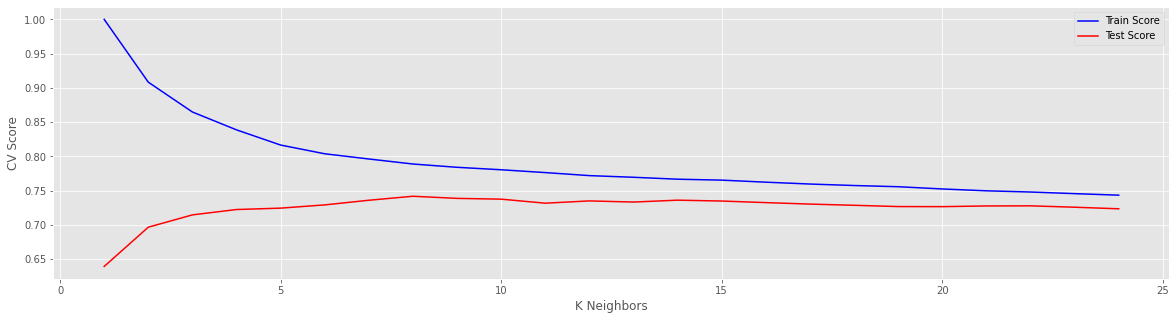

In [ ]:
# Plot CV Score
x_axis = range(1,25)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, grid_knn_pca.cv_results_["mean_train_score"], c = 'b', label = 'Train Score')
plt.plot(x_axis, grid_knn_pca.cv_results_["mean_test_score"], c = 'r', label = 'Test Score')
plt.legend()
plt.xlabel('K Neighbors')
plt.ylabel('CV Score')

### Linear Regression

In [ ]:
# Model and Eval
linreg_pca = LinearRegression()
linreg_pca.fit(X_train_pca, y_train_pca)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linreg_train_score_pca = linreg_pca.score(X_train_pca, y_train_pca)
linreg_test_score_pca = linreg_pca.score(X_test_pca, y_test_pca)
model_results_linreg_pca = pd.DataFrame([['Linear_Regress_pca', linreg_train_score_pca, linreg_test_score_pca]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_linreg_pca)
results = results.append(model_results_linreg_pca, ignore_index = True)

         Model_GridCV  Train R^2  Test R^2
0  Linear_Regress_pca   0.830309  0.828392


### Ridge Regression

In [ ]:
# Create HyperP dict
param_ridge_pca = {'alpha': [0.0001,0.01, 0.1, 1, 10, 100, 500, 1000]}
print("Parameter grid:\n{}".format(param_ridge_pca))

Parameter grid:
{'alpha': [0.0001, 0.01, 0.1, 1, 10, 100, 500, 1000]}


In [ ]:
# GridS/CrossV Ridge - return best
ridge_pca = Ridge()
grid_ridge_pca = GridSearchCV(ridge_pca, param_ridge_pca, cv = 5, return_train_score = True)
grid_ridge_pca.fit(X_train_pca, y_train_pca)
print("Best parameters: {}".format(grid_ridge_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_ridge_pca.best_score_))

Best parameters: {'alpha': 500}
Best cross-validation score: 0.8015


In [ ]:
# Coef of Determination
print(grid_ridge_pca.score(X_train_pca, y_train_pca))
print(grid_ridge_pca.score(X_test_pca, y_test_pca))

0.8230677947570746
0.8174279583938265


In [ ]:
ridge_train_score_pca = grid_ridge_pca.score(X_train_pca, y_train_pca)
ridge_test_score_pca = grid_ridge_pca.score(X_test_pca, y_test_pca)
model_results_ridge_pca = pd.DataFrame([['Ridge_Regress_pca', ridge_train_score_pca, ridge_test_score_pca]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_ridge_pca)
results = results.append(model_results_ridge_pca, ignore_index = True)

        Model_GridCV  Train R^2  Test R^2
0  Ridge_Regress_pca   0.823068  0.817428


In [ ]:
# Display results table
results_ridge_pca = pd.DataFrame(grid_ridge_pca.cv_results_).sort_values(by='rank_test_score')
display(results_ridge_pca.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.002738,0.000059,0.000972,0.000032,500,{'alpha': 500},0.813278,0.797974,0.691802,0.848965,0.855594,0.801523,0.058930,1,0.816846,0.825961,0.857558,0.812460,0.810728,0.824711,0.017251
5,0.003094,0.000431,0.000993,0.000059,100,{'alpha': 100},0.824002,0.787293,0.668449,0.840222,0.857930,0.795579,0.067704,2,0.826199,0.835253,0.869238,0.822761,0.819361,0.834562,0.018128
7,0.002736,0.000101,0.001020,0.000093,1000,{'alpha': 1000},0.795602,0.800236,0.695632,0.839891,0.842900,0.794852,0.053313,3,0.803273,0.811920,0.841460,0.798334,0.797929,0.810583,0.016241
4,0.002920,0.000349,0.001333,0.000751,10,{'alpha': 10},0.815084,0.775590,0.647489,0.687781,0.715560,0.728301,0.060170,4,0.827094,0.836099,0.870447,0.824313,0.820555,0.835702,0.018114
3,0.003820,0.002030,0.001092,0.000155,1,{'alpha': 1},0.569290,0.767820,0.624495,-3.719381,-0.640827,-0.479721,1.696905,5,0.827251,0.836115,0.870486,0.826283,0.821256,0.836278,0.017761
2,0.002909,0.000207,0.001240,0.000205,0.1,{'alpha': 0.1},0.004086,0.766470,0.617652,-14.543875,-1.685229,-2.968179,5.852911,6,0.827311,0.836116,0.870487,0.827124,0.821342,0.836476,0.017649
1,0.002902,0.000457,0.000967,0.000033,0.01,{'alpha': 0.01},-0.144241,0.766326,0.616840,-17.480104,-1.847175,-3.617671,6.993096,7,0.827313,0.836116,0.870487,0.827153,0.821343,0.836482,0.017645
0,0.012173,0.003409,0.001611,0.000476,0.0001,{'alpha': 0.0001},-0.162985,0.766310,0.616749,-17.853528,-1.865936,-3.699878,7.138331,8,0.827313,0.836116,0.870487,0.827154,0.821343,0.836483,0.017645


### Lasso regression

In [ ]:
# Create HyperP dict
param_lasso_pca = {'alpha': [0.0001,0.01, 0.1, 1, 10, 100, 500, 1000]}
print("Parameter grid:\n{}".format(param_lasso_pca))

Parameter grid:
{'alpha': [0.0001, 0.01, 0.1, 1, 10, 100, 500, 1000]}


In [ ]:
# GridS/CrossV Lasso - return best
lasso_pca = Lasso()
grid_lasso_pca = GridSearchCV(lasso_pca, param_lasso_pca, cv = 5, return_train_score = True)
grid_lasso_pca.fit(X_train_pca, y_train_pca)
print("Best parameters: {}".format(grid_lasso_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_lasso_pca.best_score_))

Best parameters: {'alpha': 1000}
Best cross-validation score: 0.8013


In [ ]:
# Coef of Determination
print(grid_lasso_pca.score(X_train_pca, y_train_pca))
print(grid_lasso_pca.score(X_test_pca, y_test_pca))

0.8205300066957308
0.8170279965116126


In [ ]:
lasso_train_score_pca = grid_lasso_pca.score(X_train_pca, y_train_pca)
lasso_test_score_pca = grid_lasso_pca.score(X_test_pca, y_test_pca)
model_results_lasso_pca = pd.DataFrame([['Lasso_Regress_pca', lasso_train_score_pca, lasso_test_score_pca]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_lasso_pca)
results = results.append(model_results_lasso_pca, ignore_index = True)

        Model_GridCV  Train R^2  Test R^2
0  Lasso_Regress_pca    0.82053  0.817028


In [ ]:
# Display results table
results_lasso_pca = pd.DataFrame(grid_lasso_pca.cv_results_).sort_values(by='rank_test_score')
display(results_lasso_pca.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,0.002507,0.000077,0.000969,0.000055,1000,{'alpha': 1000},0.822344,0.785438,0.690443,0.846445,0.862046,0.801343,0.061175,1,0.817469,0.827036,0.858641,0.813933,0.810953,0.825606,0.017381
6,0.003005,0.000251,0.000964,0.000018,500,{'alpha': 500},0.824255,0.782587,0.677319,0.838574,0.863611,0.797269,0.065482,2,0.824176,0.833320,0.867124,0.820904,0.817372,0.832579,0.018067
5,0.004406,0.000381,0.001037,0.000062,100,{'alpha': 100},0.821295,0.781905,0.657219,0.824145,0.851707,0.787254,0.068719,3,0.826960,0.835905,0.870283,0.823735,0.820072,0.835391,0.018217
4,0.036389,0.020985,0.001184,0.000040,10,{'alpha': 10},0.755928,0.770527,0.634333,-5.847472,-0.604639,-0.858265,2.547271,4,0.827174,0.836113,0.870480,0.826604,0.821248,0.836324,0.017732
3,0.048643,0.022751,0.001217,0.000063,1,{'alpha': 1},0.153219,0.766760,0.619457,-13.604315,-1.713854,-2.755746,5.496164,5,0.827305,0.836116,0.870487,0.827104,0.821342,0.836471,0.017651
2,0.054107,0.022696,0.001243,0.000033,0.1,{'alpha': 0.1},0.026611,0.766357,0.617024,-14.573662,-1.844020,-3.001538,5.860283,6,0.827310,0.836116,0.870487,0.827125,0.821343,0.836476,0.017649
1,0.054921,0.018198,0.001289,0.000043,0.01,{'alpha': 0.01},0.012733,0.766314,0.616776,-14.672410,-1.857214,-3.026760,5.897292,7,0.827311,0.836116,0.870487,0.827127,0.821343,0.836477,0.017648
0,0.063850,0.013599,0.001284,0.000065,0.0001,{'alpha': 0.0001},0.011195,0.766309,0.616749,-14.683292,-1.858668,-3.029541,5.901370,8,0.827311,0.836116,0.870487,0.827127,0.821343,0.836477,0.017648


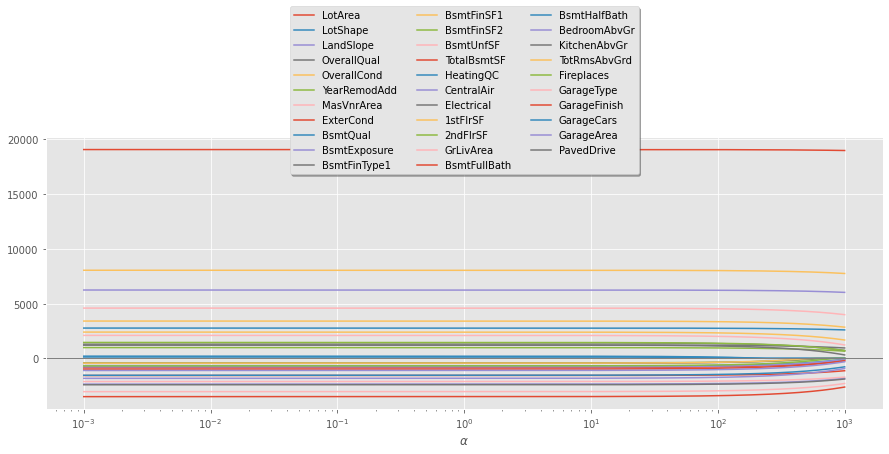

In [ ]:
# Regularization Effects and Feature Importance
x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff_pca = []

for alpha in x_range: 
    lasso_pca = Lasso(alpha)
    lasso_pca.fit(X_train_pca,y_train_pca)
    coeff_pca.append(lasso_pca.coef_ )
    
coeff_pca = np.array(coeff_pca)

plt.subplots(figsize = (15,5))
for i in range(0,32):
    plt.plot(x_range, coeff_pca[:,i], label = X_pca.columns[i])

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

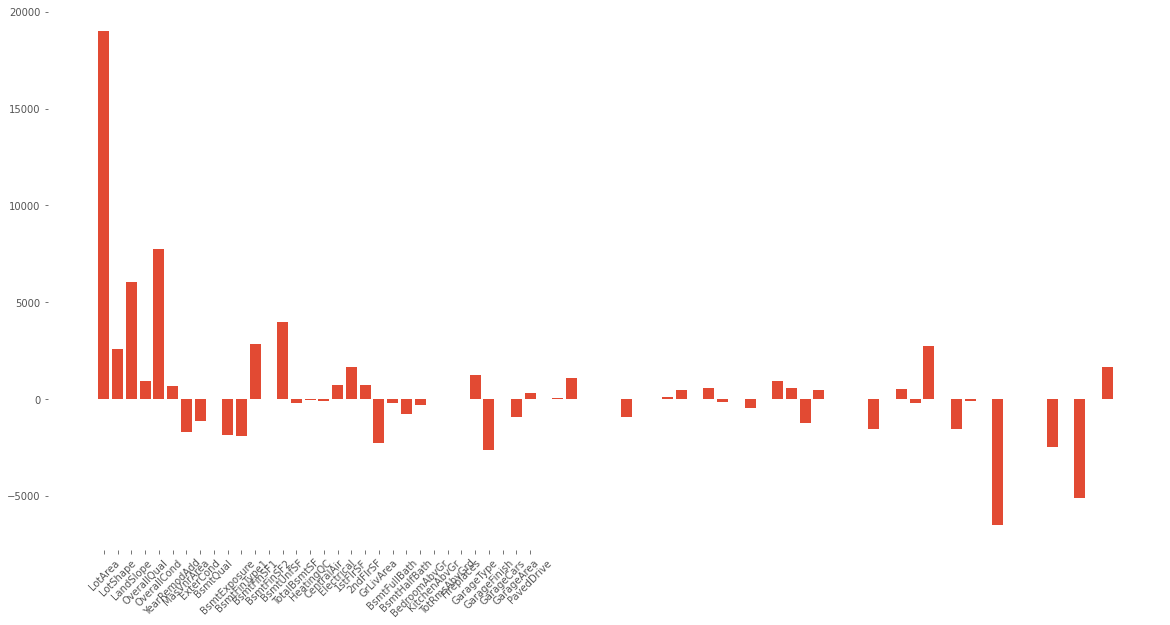

In [ ]:
# Feature Importance
plt.subplots(figsize = (20,10))
plt.style.use('ggplot')
plt.bar(range(74), lasso_pca.coef_)
plt.box(False)
plt.xticks(range(32), X_pca.columns, rotation = 45)
plt.grid()

### SVM

#### LinearSVR

In [ ]:
# GridS/CrossV LinearSVR - return best
linsvr_pca = LinearSVR()
grid_linsvr_pca = GridSearchCV(linsvr_pca, {'C': [0.001, 0.01, 1, 10, 100, 1000, 2000, 5000]}, cv = 5, return_train_score = True)
grid_linsvr_pca.fit(X_train_pca, y_train_pca)
print("Best parameters: {}".format(grid_linsvr_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_linsvr_pca.best_score_))

Best parameters: {'C': 1000}
Best cross-validation score: 0.7305


In [ ]:
linsvr_train_score_pca = grid_linsvr_pca.score(X_train_pca, y_train_pca)
linsvr_test_score_pca = grid_linsvr_pca.score(X_test_pca, y_test_pca)
model_results_linsvr_pca = pd.DataFrame([['LinearSVR_pca', linsvr_train_score_pca, linsvr_test_score_pca]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_linsvr_pca)
results = results.append(model_results_linsvr_pca, ignore_index = True)

    Model_GridCV  Train R^2  Test R^2
0  LinearSVR_pca   0.803831  0.813149


#### Linear Kernel

In [ ]:
# GridS/CrossV Linear kernel - return best
lin_pca = SVR(kernel = "linear")
grid_lin_pca = GridSearchCV(lin_pca, {'C': [0.001, 0.01, 1, 10, 100, 1000, 2000, 5000]}, cv = 5, return_train_score = True)
grid_lin_pca.fit(X_train_pca, y_train_pca)
print("Best parameters: {}".format(grid_lin_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_lin_pca.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.7983


In [ ]:
# Coef of Determination
print(grid_lin_pca.score(X_train_pca, y_train_pca))
print(grid_lin_pca.score(X_test_pca, y_test_pca))

0.8033748042545203
0.8108358930599592


In [ ]:
linear_kernel_train_score_pca = grid_lin_pca.score(X_train_pca, y_train_pca)
linear_kernel_test_score_pca = grid_lin_pca.score(X_test_pca, y_test_pca)
model_results_linear_kernel_pca = pd.DataFrame([['Linear_kernel_pca', linear_kernel_train_score_pca, linear_kernel_test_score_pca]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_linear_kernel_pca)
results = results.append(model_results_linear_kernel_pca, ignore_index = True)

        Model_GridCV  Train R^2  Test R^2
0  Linear_kernel_pca   0.803375  0.810836


In [ ]:
# Display results table
results_lin_pca = pd.DataFrame(grid_lin_pca.cv_results_).sort_values(by='rank_test_score')
display(results_lin_pca.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.141058,0.010212,0.019865,0.000093,100,{'C': 100},0.815687,0.784927,0.673612,0.863545,0.853889,0.798332,0.068374,1,0.798466,0.799854,0.838111,0.790227,0.789494,0.803230,0.017936
5,1.103217,1.198084,0.020036,0.000160,1000,{'C': 1000},0.839203,0.765740,0.651214,0.852900,0.856843,0.793180,0.078288,2,0.800715,0.808293,0.853655,0.800327,0.795520,0.811702,0.021371
6,1.339071,0.931700,0.020040,0.000174,2000,{'C': 2000},0.839896,0.762097,0.646903,0.812813,0.843201,0.780982,0.073060,3,0.799431,0.807770,0.854378,0.799795,0.795033,0.811281,0.021936
7,3.925688,2.596982,0.020043,0.000346,5000,{'C': 5000},0.839147,0.759682,0.641556,0.657871,0.813834,0.742418,0.080095,4,0.799153,0.807143,0.854861,0.799265,0.794958,0.811076,0.022244
3,0.114832,0.001974,0.019909,0.000140,10,{'C': 10},0.629964,0.676992,0.592135,0.689941,0.678697,0.653546,0.036971,5,0.658346,0.648471,0.671812,0.647387,0.644974,0.654198,0.009917
2,0.110376,0.002480,0.019968,0.000091,1,{'C': 1},0.107528,0.078688,0.133953,0.139799,0.126181,0.117230,0.022130,6,0.123120,0.115240,0.126716,0.121602,0.126175,0.122571,0.004127
1,0.108980,0.002157,0.019938,0.000254,0.01,{'C': 0.01},-0.044740,-0.111624,-0.013941,-0.030837,-0.052257,-0.050680,0.033152,7,-0.043601,-0.044728,-0.043713,-0.046634,-0.041559,-0.044047,0.001653
0,0.116877,0.012418,0.019956,0.000284,0.001,{'C': 0.001},-0.046038,-0.113845,-0.015409,-0.032615,-0.054131,-0.052408,0.033403,8,-0.045040,-0.046507,-0.045396,-0.048396,-0.043306,-0.045729,0.001684


#### RBF Kernel

In [ ]:
# Create HyperP dict
param_rbf_pca = {'C': [0.001, 0.01, 1, 10, 100, 1000, 2000, 5000], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_rbf_pca))

Parameter grid:
{'C': [0.001, 0.01, 1, 10, 100, 1000, 2000, 5000], 'gamma': [0.001, 0.01, 0.1, 1, 10]}


In [ ]:
# GridS/CrossV RBF kernel - return best
rbf_pca = SVR(kernel = "rbf")
grid_rbf_pca = GridSearchCV(rbf_pca, param_rbf_pca, cv = 5, return_train_score = True)
grid_rbf_pca.fit(X_train_pca, y_train_pca)
print("Best parameters: {}".format(grid_rbf_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_rbf_pca.best_score_))

Best parameters: {'C': 5000, 'gamma': 0.01}
Best cross-validation score: 0.6255


In [ ]:
# Coef of Determination
print(grid_rbf_pca.score(X_train_pca, y_train_pca))
print(grid_rbf_pca.score(X_test_pca, y_test_pca))

0.6714008391185644
0.627702171813005


In [ ]:
rbf_train_score_pca = grid_rbf_pca.score(X_train_pca, y_train_pca)
rbf_test_score_pca = grid_rbf_pca.score(X_test_pca, y_test_pca)
model_results_rbf_pca = pd.DataFrame([['RBF_kernel_pca', rbf_train_score_pca, rbf_test_score_pca]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_rbf_pca)
results = results.append(model_results_rbf_pca, ignore_index = True)

     Model_GridCV  Train R^2  Test R^2
0  RBF_kernel_pca   0.671401  0.627702


#### Polynomial Kernel

In [ ]:
# Create HyperP dict
param_poly_pca = {'C': [0.001, 0.01, 1, 10, 1000], 'gamma': [0.01, 0.1, 1, 10], 'coef0': [1]}
print("Parameter grid:\n{}".format(param_poly_pca))

Parameter grid:
{'C': [0.001, 0.01, 1, 10, 1000], 'gamma': [0.01, 0.1, 1, 10], 'coef0': [1]}


In [ ]:
# GridS/CrossV Poly kernel - return best
poly_pca = SVR(kernel = "poly", degree = 3)
grid_poly_pca = GridSearchCV(poly_pca, param_poly_pca, cv = 5, return_train_score = True)
grid_poly_pca.fit(X_train_pca, y_train_pca)
print("Best parameters: {}".format(grid_poly_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly_pca.best_score_))

Best parameters: {'C': 1000, 'coef0': 1, 'gamma': 0.01}
Best cross-validation score: 0.7852


In [ ]:
# Coef of Determination
print(grid_poly_pca.score(X_train_pca, y_train_pca))
print(grid_poly_pca.score(X_test_pca, y_test_pca))

0.8588464906023636
0.8471474176835162


In [ ]:
poly_train_score_pca = grid_poly_pca.score(X_train_pca, y_train_pca)
poly_test_score_pca = grid_poly_pca.score(X_test_pca, y_test_pca)
model_results_poly_pca = pd.DataFrame([['Poly_kernel_pca', poly_train_score_pca, poly_test_score_pca]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_poly_pca)
results = results.append(model_results_poly_pca, ignore_index = True)

      Model_GridCV  Train R^2  Test R^2
0  Poly_kernel_pca   0.858846  0.847147


### Decision Tree Regressor

In [ ]:
# Create HyperP dict
param_tree_pca = {'max_depth': [5, 10, 20, 50], 'min_samples_split': [2, 5, 10, 20]}
print("Parameter grid:\n{}".format(param_tree_pca))

Parameter grid:
{'max_depth': [5, 10, 20, 50], 'min_samples_split': [2, 5, 10, 20]}


In [ ]:
# GridS/CrossV Decision Tree - return best
tree_pca = DecisionTreeRegressor(random_state = 0)
grid_tree_pca = GridSearchCV(tree_pca, param_tree_pca, cv = 5, return_train_score = True)
grid_tree_pca.fit(X_train_pca, y_train_pca)
print("Best parameters: {}".format(grid_tree_pca.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_tree_pca.score(X_test_pca, y_test_pca)))

Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Best cross-validation score: 0.8085


In [ ]:
tree_train_score_pca = grid_tree_pca.score(X_train_pca, y_train_pca)
tree_test_score_pca = grid_tree_pca.score(X_test_pca, y_test_pca)
model_results_tree_pca = pd.DataFrame([['Decision_tree_pca', tree_train_score_pca, tree_test_score_pca]],
               columns = ['Model_GridCV', 'Train R^2', 'Test R^2'])

print(model_results_tree_pca)
results = results.append(model_results_tree_pca, ignore_index = True)

        Model_GridCV  Train R^2  Test R^2
0  Decision_tree_pca   0.903704  0.808473


Text(0, 0.5, 'House Price')

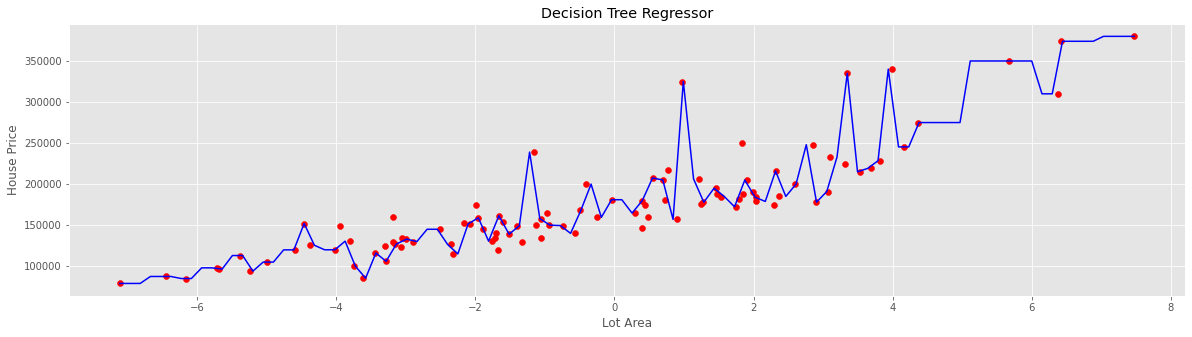

In [ ]:
# Regress Price by Lot Area
xx_pca = X_train_pca[:100,0].reshape(-1,1)
yy_pca = y_train_pca[:100]
tree_pca.fit(xx_pca, yy_pca)

X_new_pca = np.linspace(xx_pca.min(), xx_pca.max(), 100).reshape(100, 1)
y_predict_pca = tree_pca.predict(X_new_pca)

plt.subplots(figsize = (20,5))
plt.plot(X_new_pca, y_predict_pca, c = "b")
plt.scatter(xx_pca, yy_pca, color = "r")
plt.title("Decision Tree Regressor")
plt.xlabel("Lot Area")
plt.ylabel("House Price")

## Neural Network

**A multilayer neural network is constructed using Keras high-level API. The number of nodes are selected based on the powers of 2 for performance gain.  Batch normalization is incorporated prior to dropout regularization to enhance stability of the model. Where batch normalization is utilized, the bias is removed for practical reasons.  Leaky relu functions are used for all input and hidden layers given their predictive strength, and he uniform initilization is incorporated for it's robust partnership with the leaky relu function. Given the relatively small size of the data set, a batch size of 32 and validation set percentage of 10 is chosen. The Adam optimization function with a learning rate of 0.005 produced the best performance across 400 epochs. The mean square error is the selected loss function, but the evaluation metrics used are the RMSE and the MAPE given their consistent interpretability for the original data.**

In [ ]:
neural = keras.Sequential([
    keras.layers.Dense(128, activation= tf.keras.layers.LeakyReLU(0.01), kernel_initializer='he_uniform', use_bias = False,
                       kernel_regularizer=keras.regularizers.l1(0.01)),
    keras.layers.BatchNormalization(momentum = 0.99, epsilon = 1e-09),
    keras.layers.Dense(128, activation= tf.keras.layers.LeakyReLU(0.01), kernel_initializer='he_uniform', use_bias = False, 
                       kernel_regularizer=keras.regularizers.l1(0.01)),
    keras.layers.BatchNormalization(momentum = 0.99, epsilon = 1e-09),
    keras.layers.Dense(256, activation= tf.keras.layers.LeakyReLU(0.01), kernel_initializer='he_uniform', use_bias = False, 
                       kernel_regularizer=keras.regularizers.l1(0.01)),
    keras.layers.BatchNormalization(momentum = 0.99, epsilon = 1e-09),
    keras.layers.Dense(256, activation= tf.keras.layers.LeakyReLU(0.01), kernel_initializer='he_uniform', use_bias = False, 
                       kernel_regularizer=keras.regularizers.l1(0.01)),
    keras.layers.BatchNormalization(momentum = 0.99, epsilon = 1e-09),
    keras.layers.Dense(256, activation= tf.keras.layers.LeakyReLU(0.01), kernel_initializer='he_uniform', use_bias = False, 
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(momentum = 0.99, epsilon = 1e-09),
    keras.layers.Dense(256, activation= tf.keras.layers.LeakyReLU(0.01), kernel_initializer='he_uniform', use_bias = False, 
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(momentum = 0.99, epsilon = 1e-09),
    keras.layers.Dense(256, activation= tf.keras.layers.LeakyReLU(0.01), kernel_initializer='he_uniform', use_bias = False,
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(momentum = 0.99, epsilon = 1e-09),
    keras.layers.Dense(128, activation= tf.keras.layers.LeakyReLU(0.01), kernel_initializer='he_uniform', use_bias = False,
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation= tf.keras.layers.LeakyReLU(0.01), kernel_initializer='he_uniform', use_bias = False, 
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation = 'linear', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01))])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsolutePercentageError()])

model.fit(X_train, y_train, batch_size=32, epochs=400, validation_split=0.1)

train_acc = model.evaluate(X_train, y_train, batch_size=32)
test_acc = model.evaluate(X_test, y_test, batch_size=32)

neural_pred = model.predict(X_test)

Epoch 1/400
33/33 [==============================] - 0s 15ms/step - loss: 257637120.0000 - root_mean_squared_error: 16051.0088 - mean_absolute_percentage_error: 6.2329 - val_loss: 943382528.0000 - val_root_mean_squared_error: 30714.4961 - val_mean_absolute_percentage_error: 10.2787
Epoch 2/400
33/33 [==============================] - 0s 6ms/step - loss: 257735360.0000 - root_mean_squared_error: 16054.0703 - mean_absolute_percentage_error: 6.6267 - val_loss: 872809024.0000 - val_root_mean_squared_error: 29543.3027 - val_mean_absolute_percentage_error: 10.1071
Epoch 3/400
33/33 [==============================] - 0s 6ms/step - loss: 223212192.0000 - root_mean_squared_error: 14940.2119 - mean_absolute_percentage_error: 6.4405 - val_loss: 903194176.0000 - val_root_mean_squared_error: 30053.1523 - val_mean_absolute_percentage_error: 9.8014
Epoch 4/400
33/33 [==============================] - 0s 6ms/step - loss: 217077280.0000 - root_mean_squared_error: 14733.4668 - mean_absolute_percentage_e

In [ ]:
neural_score = r2_score(y_test, neural_pred)
rmse_neural = np.round(np.sqrt(mean_squared_error(y_test, neural_pred)), 2)
model_results2_neural = pd.DataFrame([['Neural Network', neural_score, rmse_neural]],
                                     columns = ['Model', 'Test R^2', "RMSE"])

print(model_results2_neural)
results2 = results2.append(model_results2_neural, ignore_index = True)

            Model  Test R^2      RMSE
0  Neural Network  0.863669  32337.35


# **Final Results**

**The final results table conveys the coefficients of determination for the base models, the ensembles, the models utilizing principal features, and a neural network. The KNN model produced the worst performance with the data even though there was no overfitting. Some of the base models, including ridge, lasso, and polynomial SVR produced low variance. The decision tree and RBF SVR models produced high variance and substantially overfit the training data. The gradient boosting and polynomial SVR models performed well on both data sets. Ultimately, the gradient boosting model overfit the data but produced a r^2 greater than any other model. The polynomial SVR with no enhancements had a well balanced r^2 with train equal to 88.9% and test equal to 92.6%.  This is the final model selected to move forward for house price prediction.**

In [ ]:
print(results)

          Model_GridCV  Train R^2  Test R^2
0                  KNN   0.799715  0.793248
1       Linear_Regress   0.818131  0.840132
2        Ridge_Regress   0.815385  0.835783
3        Lasso_Regress   0.816784  0.839269
4         Poly_Regress   0.947065  0.790461
5            LinearSVR   0.801686  0.830113
6        Linear_kernel   0.801981  0.831320
7           RBF_kernel   0.773348  0.738263
8          Poly_kernel   0.925912  0.888913
9        Decision_tree   0.910911  0.846577
10             KNN_pca   0.792723  0.763505
11  Linear_Regress_pca   0.830309  0.828392
12   Ridge_Regress_pca   0.823068  0.817428
13   Lasso_Regress_pca   0.820530  0.817028
14       LinearSVR_pca   0.803831  0.813149
15   Linear_kernel_pca   0.803375  0.810836
16      RBF_kernel_pca   0.671401  0.627702
17     Poly_kernel_pca   0.858846  0.847147
18   Decision_tree_pca   0.903704  0.808473


In [ ]:
results2[["Model", "Train R^2", "Test R^2", "RMSE"]]

,Model,Train R^2,Test R^2,RMSE
0,Grid_ridge_bag,0.810178,0.830793,36025.97
1,Grid_polyKernel_bag,0.799054,0.887384,29390.44
2,Grid_RBFKernel_paste,0.678729,0.638672,52645.09
3,Grid_KNN_paste,0.769963,0.751761,43635.73
4,Grid_PolyKernel_Ada,0.955522,0.888080,29299.60
5,Grid_linearSVR_Ada,0.804378,0.831931,35904.66
6,Grad_Boost,0.970835,0.919681,24820.77
7,Neural Network,NaN,0.863669,32337.35
